In [1]:
import numpy as np
import pandas as pd

In [2]:
fname = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df = pd.read_csv(fname)

In [3]:
df.head(10)

Province/State       Country/Region      Lat      Long  \
0                           NaN          Afghanistan  33.0000   65.0000   
1                           NaN              Albania  41.1533   20.1683   
2                           NaN              Algeria  28.0339    1.6596   
3                           NaN              Andorra  42.5063    1.5218   
4                           NaN               Angola -11.2027   17.8739   
5                           NaN  Antigua and Barbuda  17.0608  -61.7964   
6                           NaN            Argentina -38.4161  -63.6167   
7                           NaN              Armenia  40.0691   45.0382   
8  Australian Capital Territory            Australia -35.4735  149.0124   
9               New South Wales            Australia -33.8688  151.2093   

   1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20   ...    3/30/20  \
0        0        0        0        0        0        0   ...          4   
1        0        0        0        0        0        0   ...         11   
2        0        0        0        0        0        0   ...         35   
3        0        0        0        0        0        0   ...          8   
4        0        0        0        0        0        0   ...          2   
5        0        0        0        0        0        0   ...          0   
6        0        0        0        0        0        0   ...         23   
7        0        0        0        0        0        0   ...          3   
8        0        0        0        0        0        0   ...          1   
9        0        0        0        0        0        0   ...          8   

   3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  4/8/20  
0        4       4       6       6       7       7      11      14      14  
1       15      15      16      17      20      20      21      22      22  
2       44      58      86     105     130     152     173     193     205  
3       12      14      15      16      17      18      21      22      23  
4        2       2       2       2       2       2       2       2       2  
5        0       0       0       0       0       0       0       1       2  
6       27      28      36      39      43      44      48      56      63  
7        3       4       7       7       7       7       8       8       9  
8        1       1       1       1       2       2       2       2       2  
9        8       9      10      12      12      16      18      21      21  

[10 rows x 82 columns]

In [4]:
df = df.astype({'Province/State': str})

In [5]:
fname = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
cases_df = pd.read_csv(fname)

In [6]:
cases_df.head(10)

Province/State       Country/Region      Lat      Long  \
0                           NaN          Afghanistan  33.0000   65.0000   
1                           NaN              Albania  41.1533   20.1683   
2                           NaN              Algeria  28.0339    1.6596   
3                           NaN              Andorra  42.5063    1.5218   
4                           NaN               Angola -11.2027   17.8739   
5                           NaN  Antigua and Barbuda  17.0608  -61.7964   
6                           NaN            Argentina -38.4161  -63.6167   
7                           NaN              Armenia  40.0691   45.0382   
8  Australian Capital Territory            Australia -35.4735  149.0124   
9               New South Wales            Australia -33.8688  151.2093   

   1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20   ...    3/30/20  \
0        0        0        0        0        0        0   ...        170   
1        0        0        0        0        0        0   ...        223   
2        0        0        0        0        0        0   ...        584   
3        0        0        0        0        0        0   ...        370   
4        0        0        0        0        0        0   ...          7   
5        0        0        0        0        0        0   ...          7   
6        0        0        0        0        0        0   ...        820   
7        0        0        0        0        0        0   ...        482   
8        0        0        0        0        0        0   ...         78   
9        0        0        0        0        3        4   ...       2032   

   3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  4/8/20  
0      174     237     273     281     299     349     367     423     444  
1      243     259     277     304     333     361     377     383     400  
2      716     847     986    1171    1251    1320    1423    1468    1572  
3      376     390     428     439     466     501     525     545     564  
4        7       8       8       8      10      14      16      17      19  
5        7       7       9      15      15      15      15      19      19  
6     1054    1054    1133    1265    1451    1451    1554    1628    1715  
7      532     571     663     736     770     822     833     853     881  
8       80      84      87      91      93      96      96      96      99  
9     2032    2182    2298    2389    2493    2580    2637    2686    2734  

[10 rows x 82 columns]

In [7]:
cases_df = cases_df.astype({'Province/State': str})

### Function definitions

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

In [10]:
EPS = 1e-16

In [11]:
def double_exp(a, mu, c, x):
    # x: numpy.array
    # a, mu, c > 0
    return c * np.exp(-mu * np.exp(-a * x)) 

In [12]:
def der_double_exp(a, mu, c, x):
    return a * mu * double_exp(a, mu, c, x) * np.exp(-a * x) 

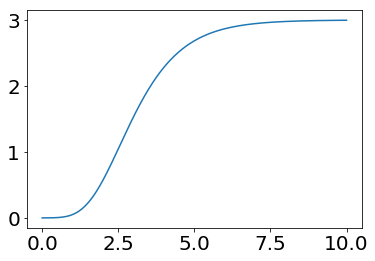

In [13]:
xx = np.linspace(0, 10, 1000)
ff = double_exp(0.9, 10.0, 3.0, xx)
plot(xx, ff)

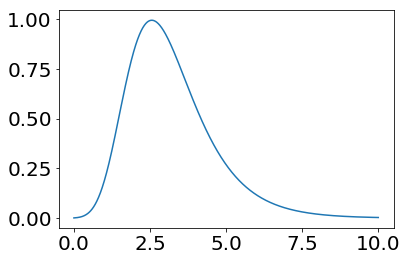

In [14]:
plot(xx, der_double_exp(0.9, 10.0, 3.0, xx))

In [15]:
from collections import namedtuple
from scipy.optimize import curve_fit

def fit_double_exp(xdata, ydata, p0=None, method='dogbox', **kwargs):
    def func(x, a, mu, c):
        return double_exp(a, mu, c, x)
    
    popt, pcov = curve_fit(func, xdata, ydata, p0=p0, method=method, bounds=(0, np.inf), **kwargs)
    return namedtuple('popt', ['a', 'mu', 'c'])(a=popt[0], mu=popt[1], c=popt[2])

In [23]:
from scipy.stats import linregress

def create_plots(ar, rows=4, cols=3, sz=20, text='', k=7, m=30, winsize=5, threshold=10, **kwargs):
    df = ar.iloc[0, 4:].astype(float)
    df = df[df > 0]
    dd = df.values
    f = figure()
    f.set_figheight(15)
    f.set_figwidth(25)
    f.suptitle(text, y=0.93, fontsize=20)
    
    subplot(rows, cols, 1)
    plot(dd)
    
    sm1 = df.transpose().rolling(winsize, center=True).mean()
    subplot(rows, cols, 2)
    plot(np.diff(sm1.values)) 
    ylabel('derivative of smoothed', fontsize=sz)    
    
    subplot(rows, cols, 3)
    plot(np.log(dd))
    ylabel('log', fontsize=sz)
        
    sm_log = np.log(df).transpose().rolling(winsize, center=True).mean().values
    subplot(rows, cols, 4)
    plot(sm_log) 
    ylabel('log smoothed', fontsize=sz)
    
    subplot(rows, cols, 5)
    plot(np.diff(sm_log))
    ylabel('derivative log', fontsize=sz)
        
    subplot(rows, cols, 6)
    sm2 = sm1.diff().rolling(winsize, center=True).mean()
    plot(sm2.diff().values) 
    ylabel('second derivative smoothed', fontsize=sz)    
    
    subplot(rows, cols, 7)
    logderlog = np.log(np.maximum(np.diff(sm_log), EPS))
    plot(logderlog)
    ylabel('log derivative log', fontsize=sz)

    # Fit last k values with least squares
    x = np.arange(len(logderlog))
    ind = np.array([False if np.isnan(z) else z > -1e3 for z in logderlog])
    coeff, b, *_ = linregress(x[ind][-k:], logderlog[ind][-k:])
    a = -coeff
    plot(x[ind][-k:], -a * x[ind][-k:] + b, 'r')
        
    if a < 1e-16:
        print("Exponential rate is increasing! (a = {}, b = {})".format(a, b))
    else:
        # Forecast
        n = len(dd)
        subplot(rows, cols, 8)
        mu = np.exp(b) / a
        
        c = 1 / np.linalg.norm(double_exp(a, mu, 1.0, np.arange(n)[-k:]))
        # Normalize data, otherwise curve_fit() does not converge
        sm1f = sm1.values[~np.isnan(sm1.values)]
        norm_dd = np.linalg.norm(sm1f[-k:])
        opt_params = fit_double_exp(np.arange(n)[-k:], sm1f[-k:] / norm_dd, p0=[a, mu, c], method='dogbox', **kwargs) 
        plot(dd)
        fit = double_exp(opt_params.a, opt_params.mu, opt_params.c, np.arange(n)[-k:]) * norm_dd
        plot(np.arange(n)[-k:], fit)
        forecast = double_exp(opt_params.a, opt_params.mu, opt_params.c, np.arange(n, n+m)) * norm_dd
        plot(np.arange(n, n+m), forecast, label='forecast')
        legend(loc='best', fontsize=sz)

        # Forecast of derivative
        subplot(rows, cols, 9)
        plot(np.diff(sm1.values))
        der_fit = der_double_exp(opt_params.a, opt_params.mu, opt_params.c, np.arange(n)[-k:]) * norm_dd
        plot(np.arange(n)[-k:], der_fit)
        der_forecast = der_double_exp(opt_params.a, opt_params.mu, opt_params.c, np.arange(n, n+m)) * norm_dd
        plot(np.arange(n, n+m), der_forecast, label='forecast\n(derivative)')
        legend(loc='best', fontsize=sz)
        
        # Find peak
        lr = der_double_exp(opt_params.a, opt_params.mu, opt_params.c, np.arange(n+300)) * norm_dd
        peak_day = np.argmax(lr)
        print("Peak in {} days".format(peak_day - n))
        ind = np.nonzero(lr < threshold)[0]
        if np.any(ind >= n):
            end_day = ind[ind >= n].min()
            print("< {} new in {} days".format(threshold, end_day - n))
        tot = double_exp(opt_params.a, opt_params.mu, opt_params.c, n+300) * norm_dd
        print("Total number = {}".format(np.round(tot).astype(int)))

    pos = 10 if a >= 1e-16 else 8
    subplot(rows, cols, pos)
    plot(np.diff(dd) / dd[1:])
    if a >= 1e-16:
        plot(np.arange(n)[-k:], der_fit / fit)
    ylabel("derivative / fn", fontsize=sz)

### Plots

In [17]:
it = df[df['Country/Region'] == 'Italy']
itc = cases_df[cases_df['Country/Region'] == 'Italy']

In [18]:
it

Province/State Country/Region   Lat  Long  1/22/20  1/23/20  1/24/20  \
137            nan          Italy  43.0  12.0        0        0        0   

     1/25/20  1/26/20  1/27/20   ...    3/30/20  3/31/20  4/1/20  4/2/20  \
137        0        0        0   ...      11591    12428   13155   13915   

     4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  4/8/20  
137   14681   15362   15887   16523   17127   17669  

[1 rows x 82 columns]

In [19]:
itc

Province/State Country/Region   Lat  Long  1/22/20  1/23/20  1/24/20  \
137            nan          Italy  43.0  12.0        0        0        0   

     1/25/20  1/26/20  1/27/20   ...    3/30/20  3/31/20  4/1/20  4/2/20  \
137        0        0        0   ...     101739   105792  110574  115242   

     4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  4/8/20  
137  119827  124632  128948  132547  135586  139422  

[1 rows x 82 columns]

Peak in -11 days
< 10 new in 53 days
Total number = 25701


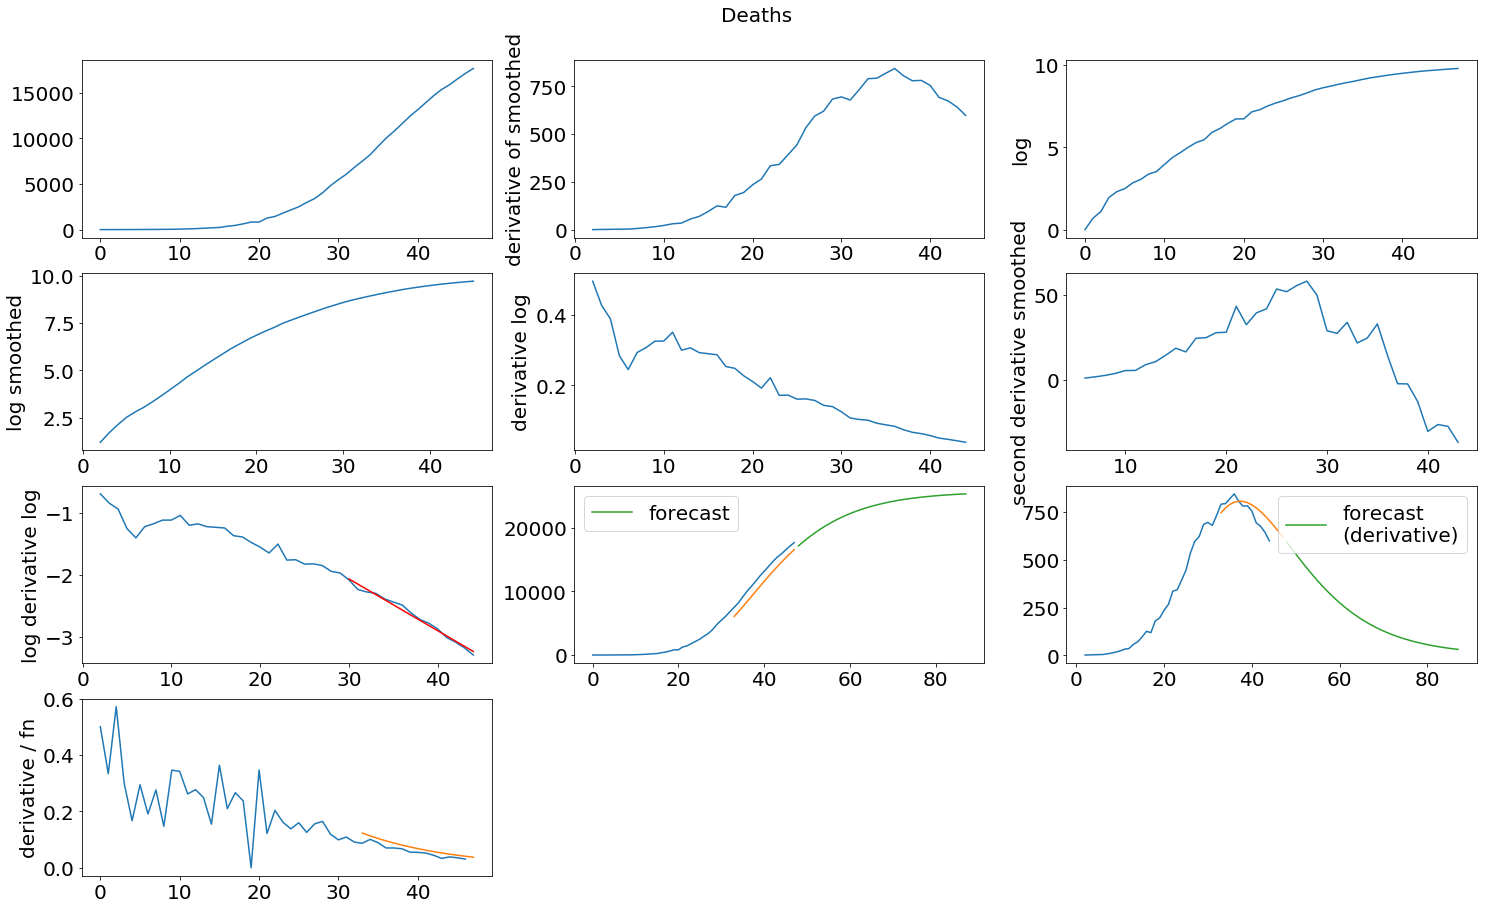

In [24]:
create_plots(it, text='Deaths', k=15, m=40, threshold=10)

Peak in -14 days
< 100 new in 49 days
Total number = 186804


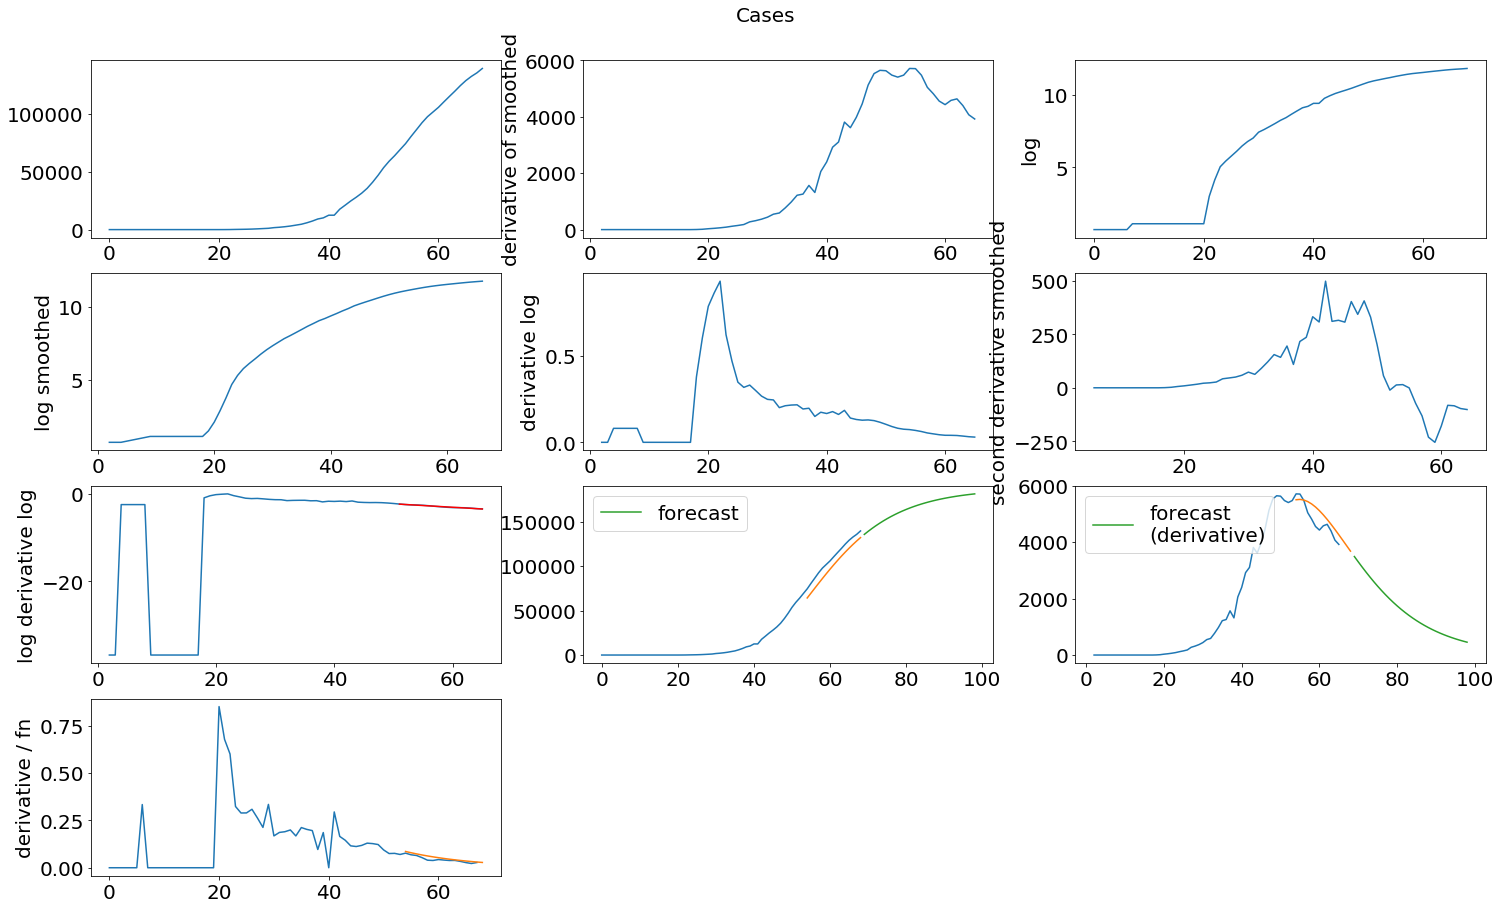

In [25]:
create_plots(itc, text='Cases', k=15, threshold=100)

In [26]:
hu = df[df['Province/State'] == 'Hubei']
huc = cases_df[cases_df['Province/State'] == 'Hubei']

Peak in -63 days
< 10 new in 0 days
Total number = 3236


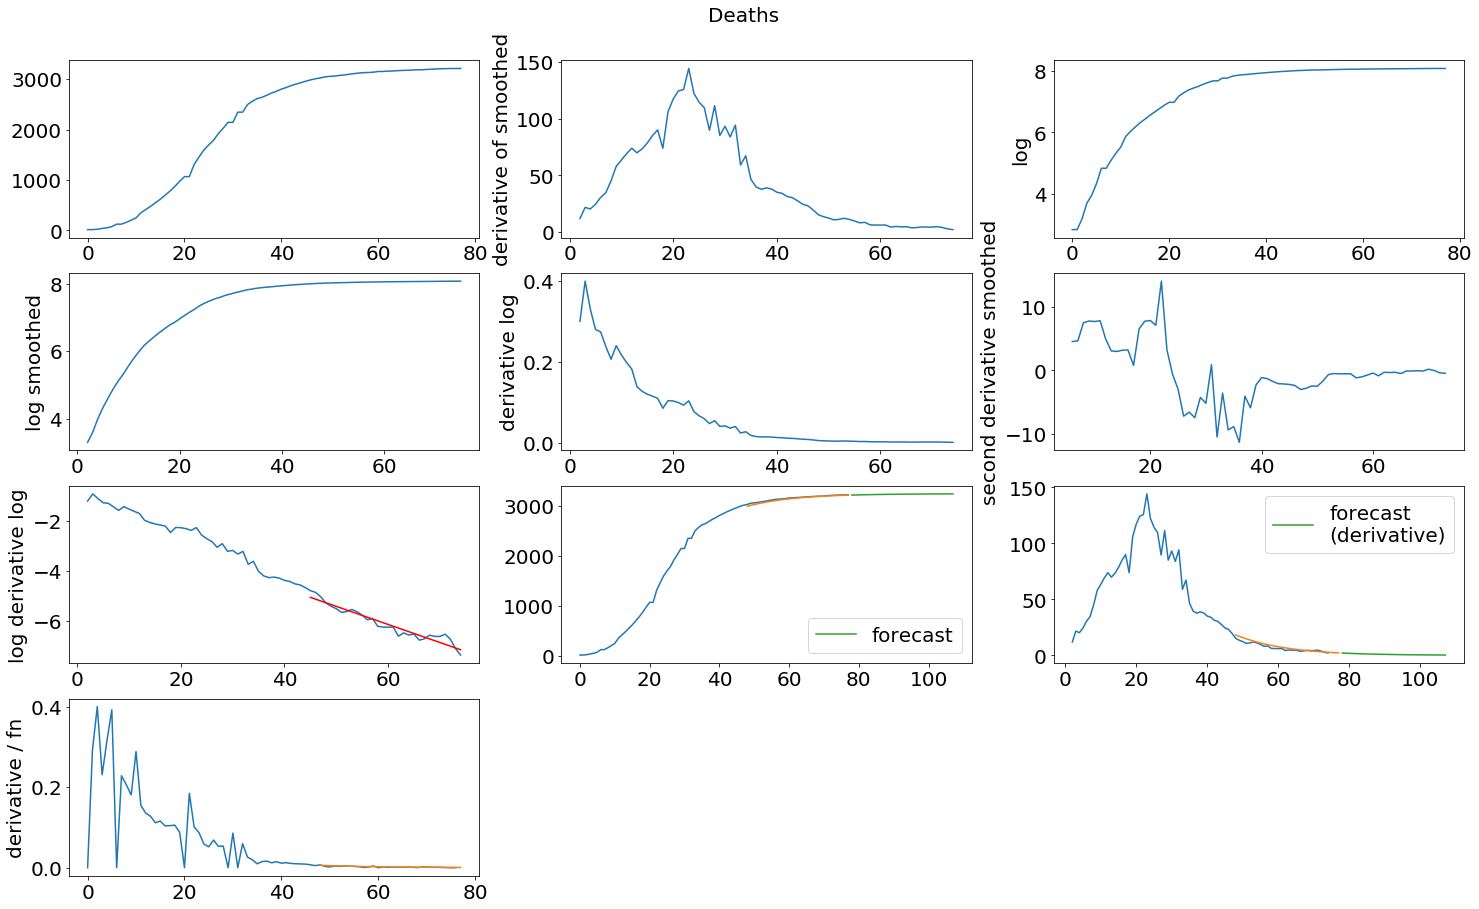

In [27]:
create_plots(hu, text='Deaths', k=30)

Peak in -47 days
< 100 new in 0 days
Total number = 67801


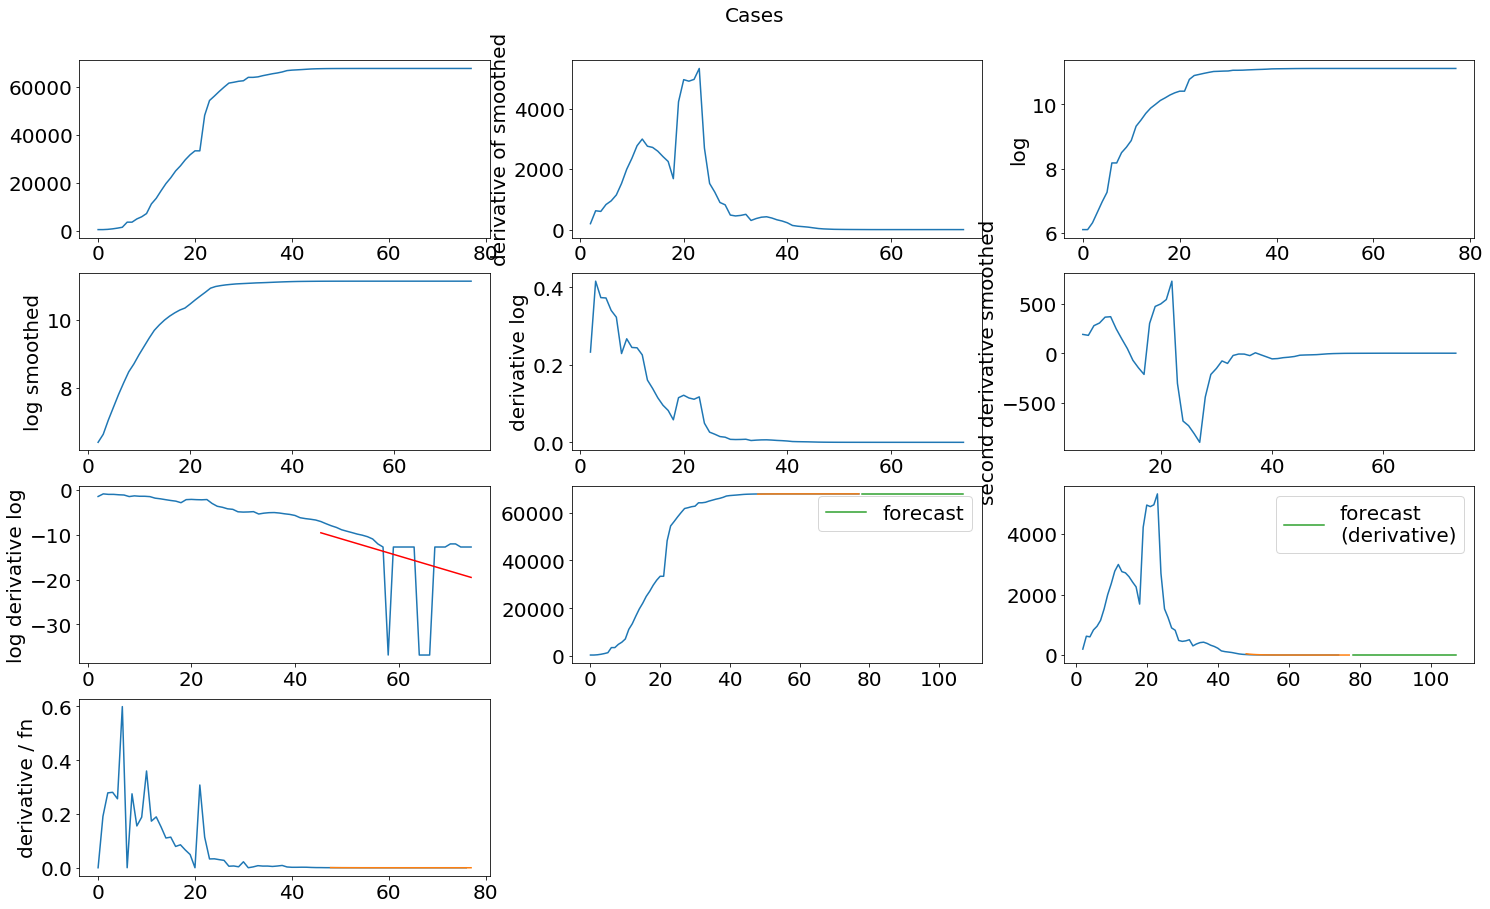

In [28]:
create_plots(huc, text='Cases', k=30, threshold=100)

In [29]:
uk = df[(df['Province/State'] == 'nan') & (df['Country/Region'] == 'United Kingdom')]

In [30]:
uk

Province/State  Country/Region      Lat   Long  1/22/20  1/23/20  1/24/20  \
223            nan  United Kingdom  55.3781 -3.436        0        0        0   

     1/25/20  1/26/20  1/27/20   ...    3/30/20  3/31/20  4/1/20  4/2/20  \
223        0        0        0   ...       1408     1789    2352    2921   

     4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  4/8/20  
223    3605    4313    4934    5373    6159    7097  

[1 rows x 82 columns]

In [31]:
ukc = cases_df[(cases_df['Province/State'] == 'nan') & (cases_df['Country/Region'] == 'United Kingdom')]

In [32]:
ukc

Province/State  Country/Region      Lat   Long  1/22/20  1/23/20  1/24/20  \
223            nan  United Kingdom  55.3781 -3.436        0        0        0   

     1/25/20  1/26/20  1/27/20   ...    3/30/20  3/31/20  4/1/20  4/2/20  \
223        0        0        0   ...      22141    25150   29474   33718   

     4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  4/8/20  
223   38168   41903   47806   51608   55242   60733  

[1 rows x 82 columns]

Peak in -1 days
< 10 new in 44 days
Total number = 15427


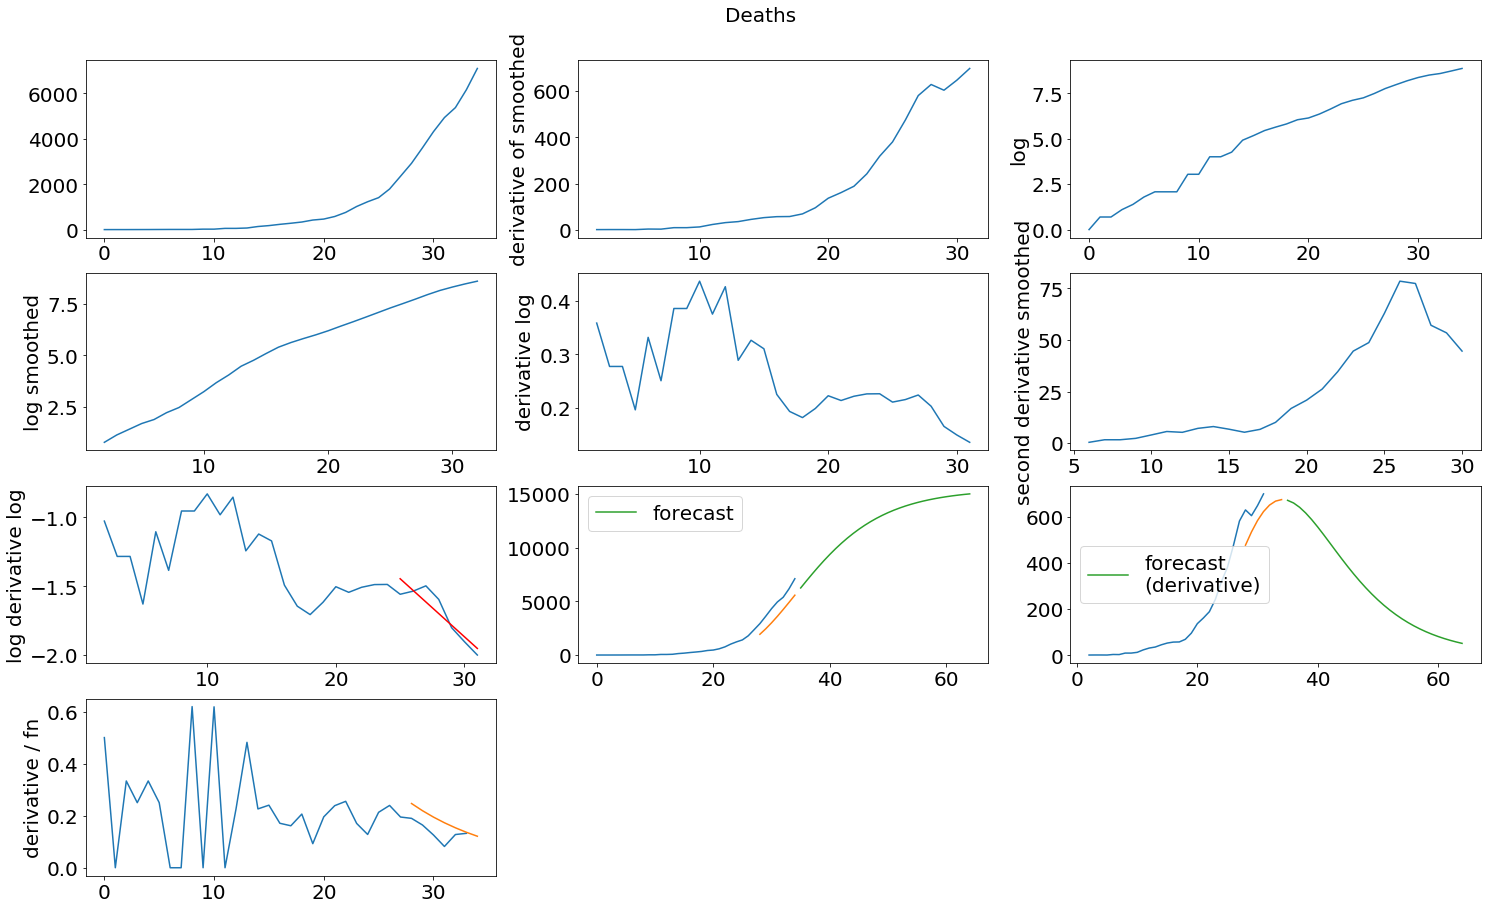

In [74]:
create_plots(uk, text='Deaths', k=7, max_nfev=1000)

Peak in 8 days
< 100 new in 97 days
Total number = 272174


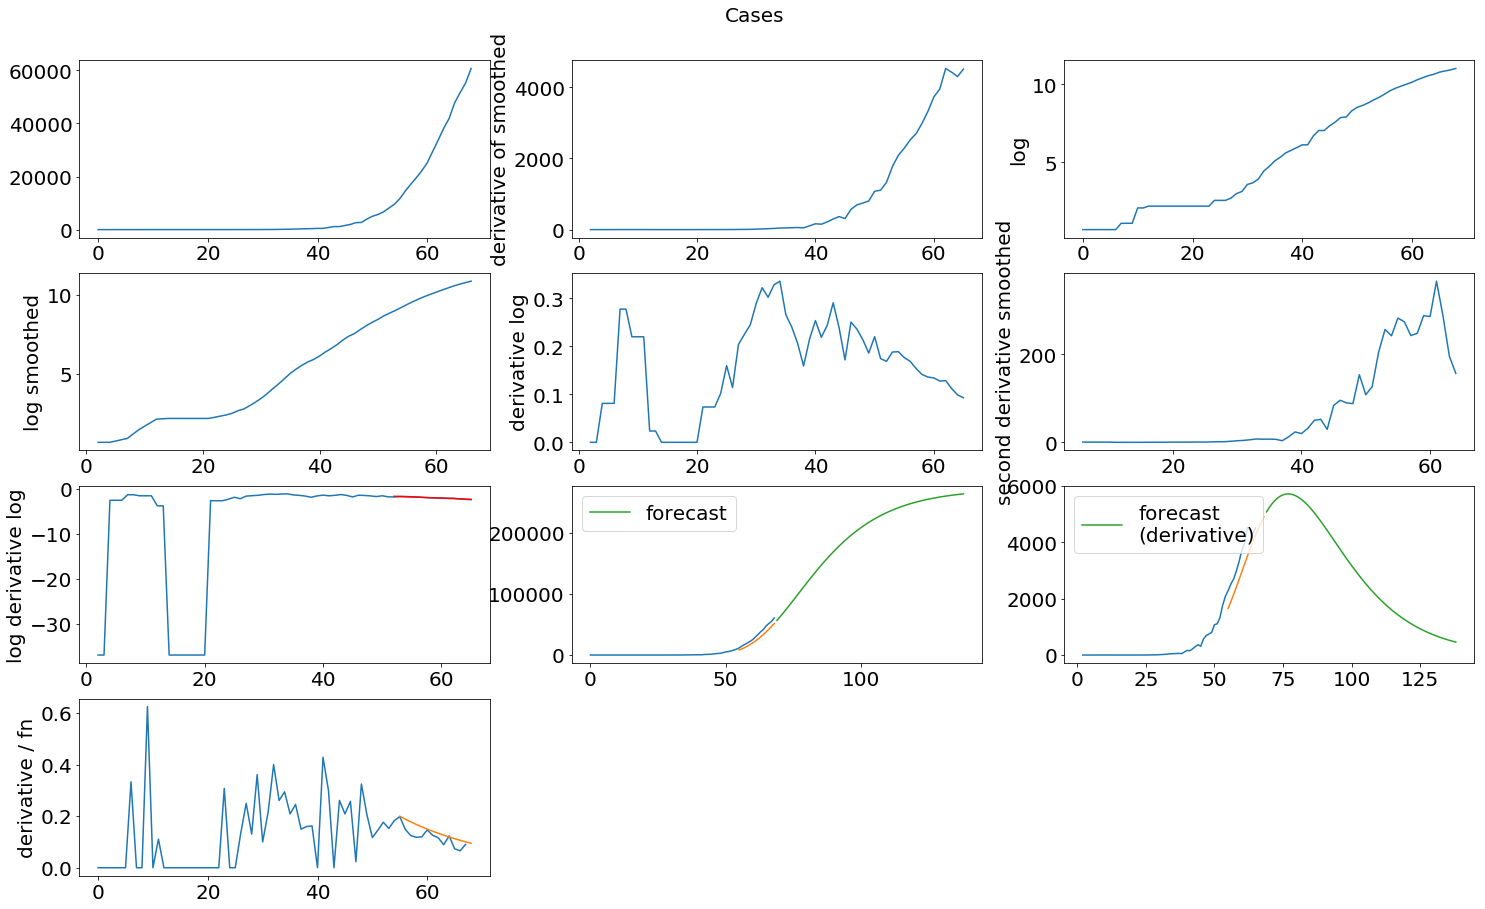

In [34]:
create_plots(ukc, text='Cases', k=14, m=70, threshold=100)

In [35]:
sp = df[df['Country/Region'] == 'Spain']
spc = cases_df[cases_df['Country/Region'] == 'Spain']

Peak in -8 days
< 10 new in 40 days
Total number = 20762


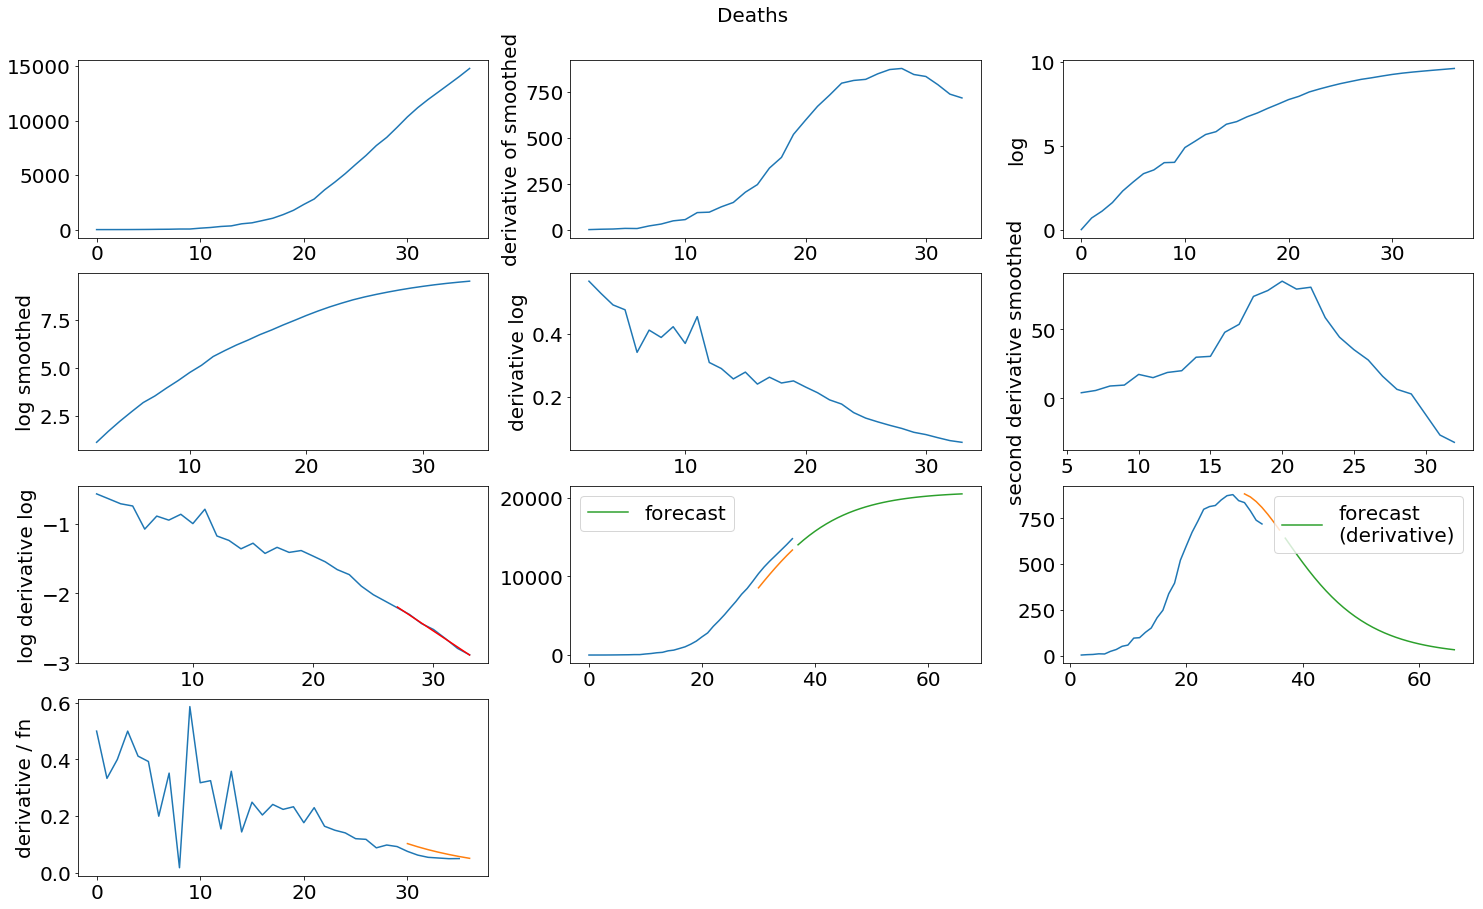

In [36]:
create_plots(sp, text='Deaths', k=7)

Peak in -10 days
< 100 new in 42 days
Total number = 204566


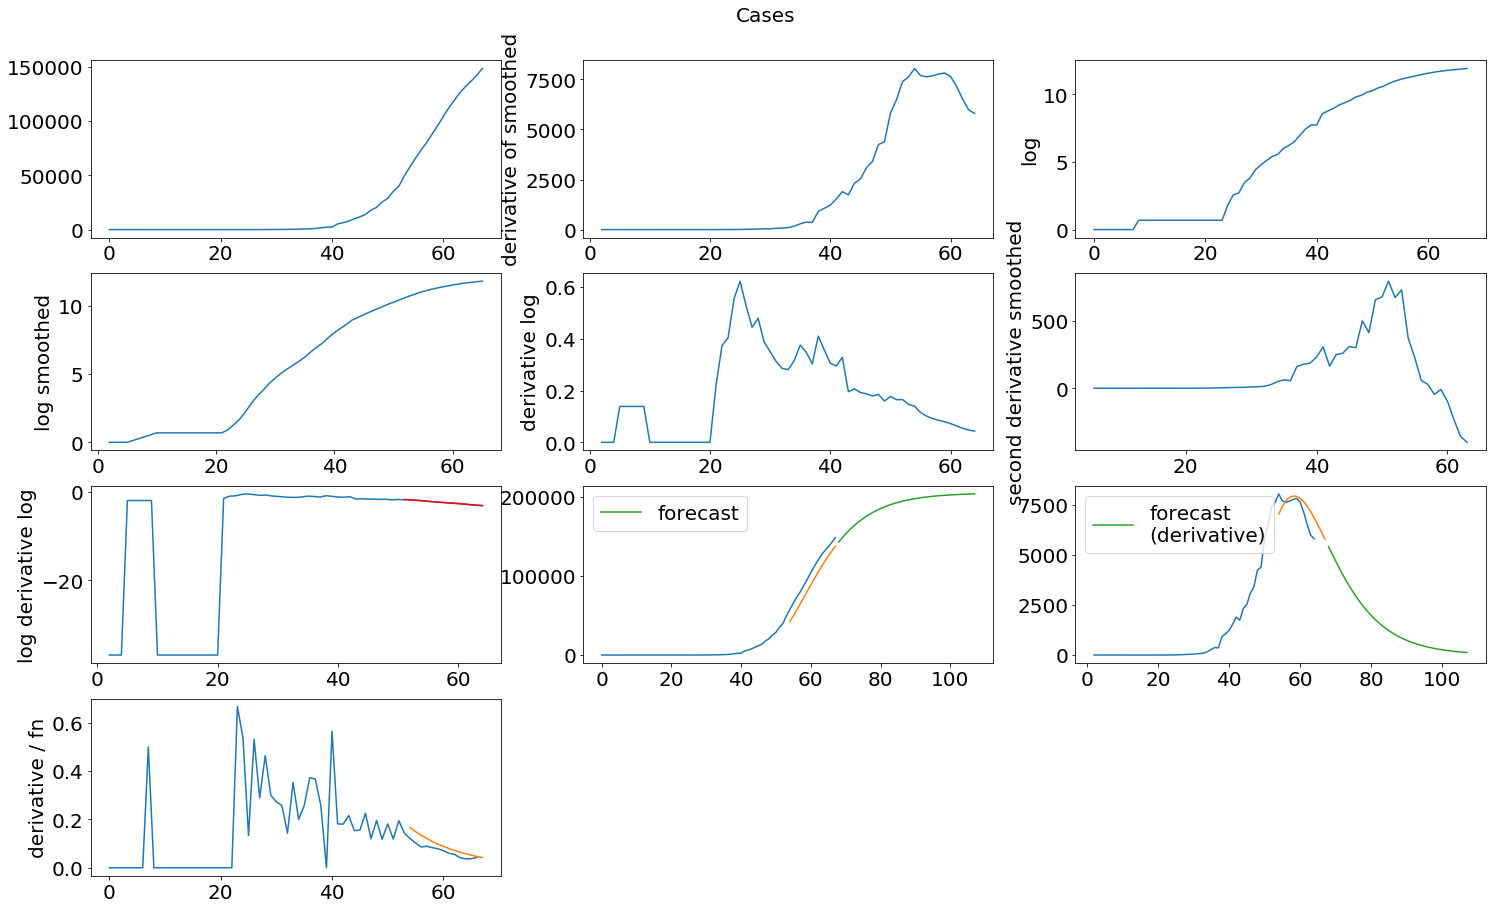

In [37]:
create_plots(spc, text='Cases', k=14, m=40, threshold=100)

In [38]:
fr = df[(df['Province/State'] == 'nan') & (df['Country/Region'] == 'France')]
frc = cases_df[(cases_df['Province/State'] == 'nan') & (cases_df['Country/Region'] == 'France')]

Peak in -3 days
< 10 new in 42 days
Total number = 20705


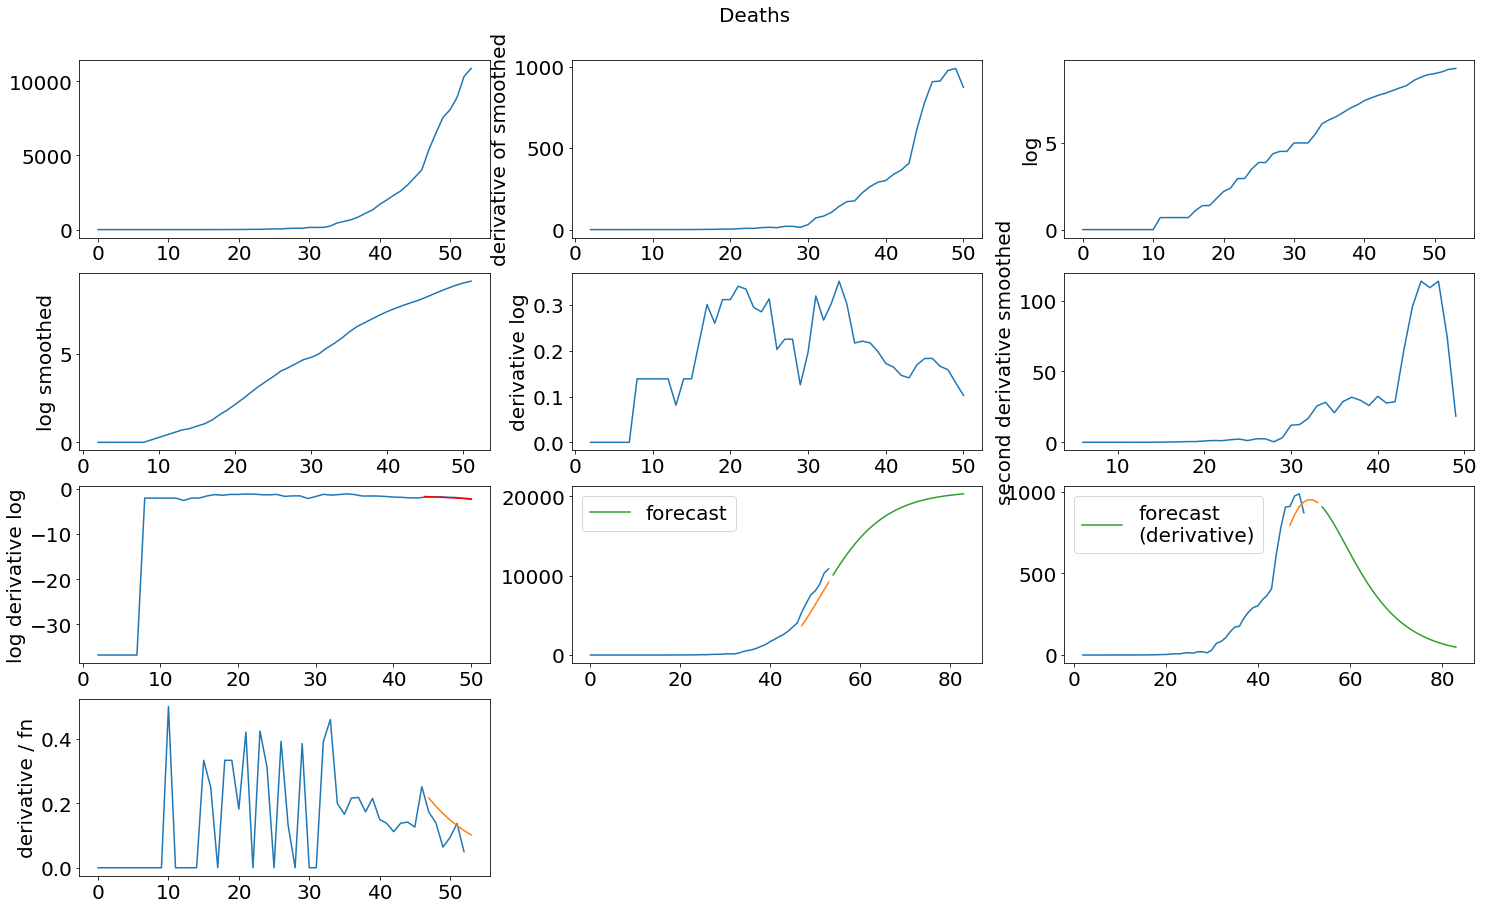

In [73]:
create_plots(fr, text='Deaths', k=7, max_nfev=1000)

Peak in 299 days
Total number = 2115173327416


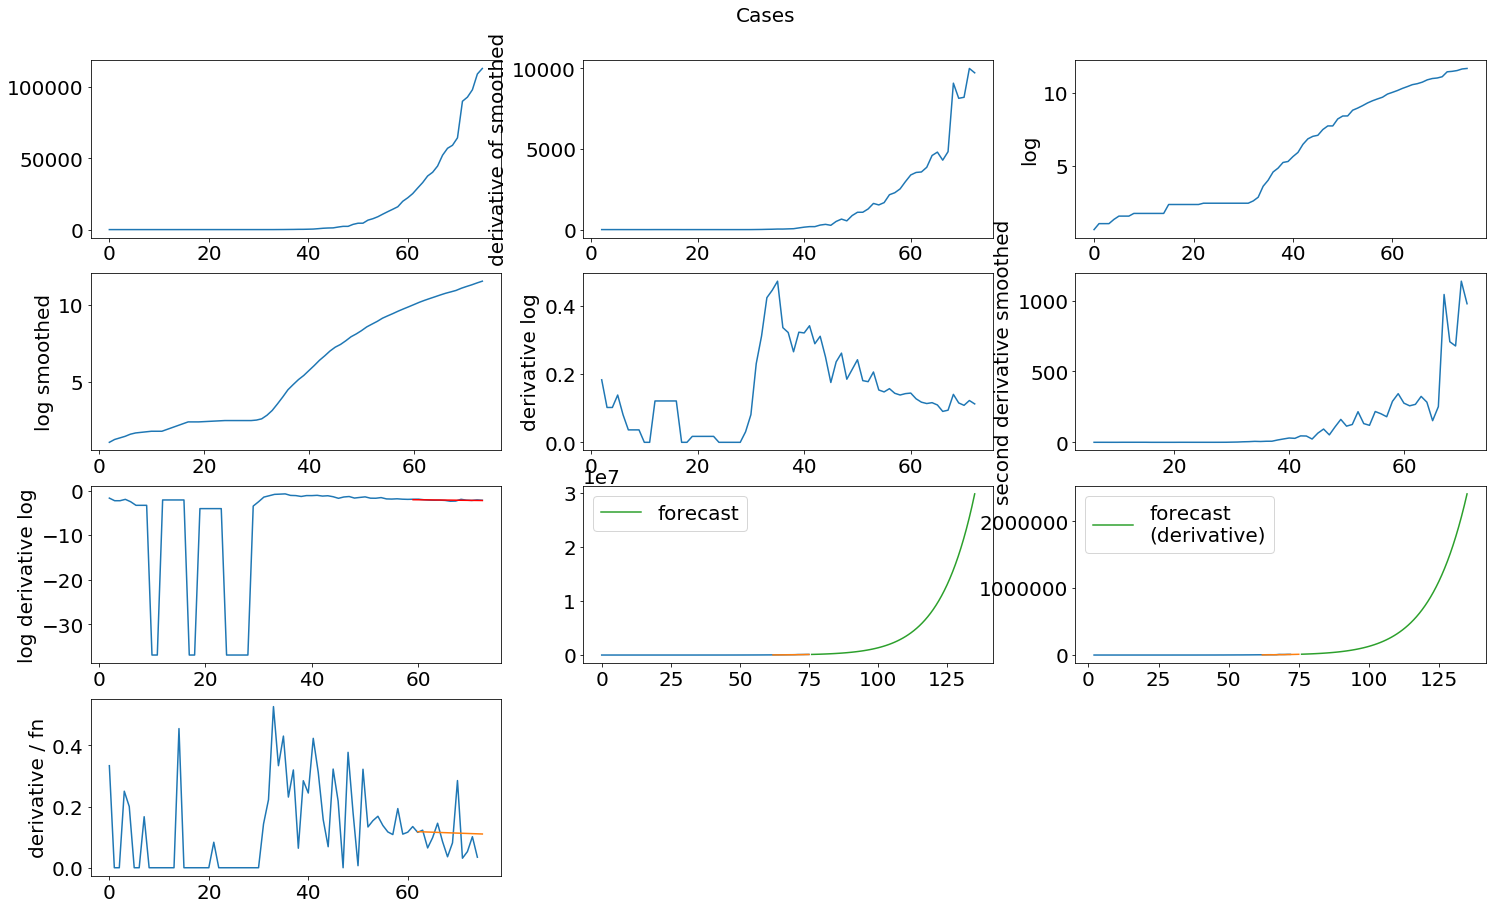

In [40]:
create_plots(frc, text='Cases', k=14, m=60, threshold=100, max_nfev=2000)

In [41]:
ger = df[df['Country/Region'] == 'Germany']
gerc = cases_df[cases_df['Country/Region'] == 'Germany']

Peak in 6 days
< 10 new in 66 days
Total number = 9173


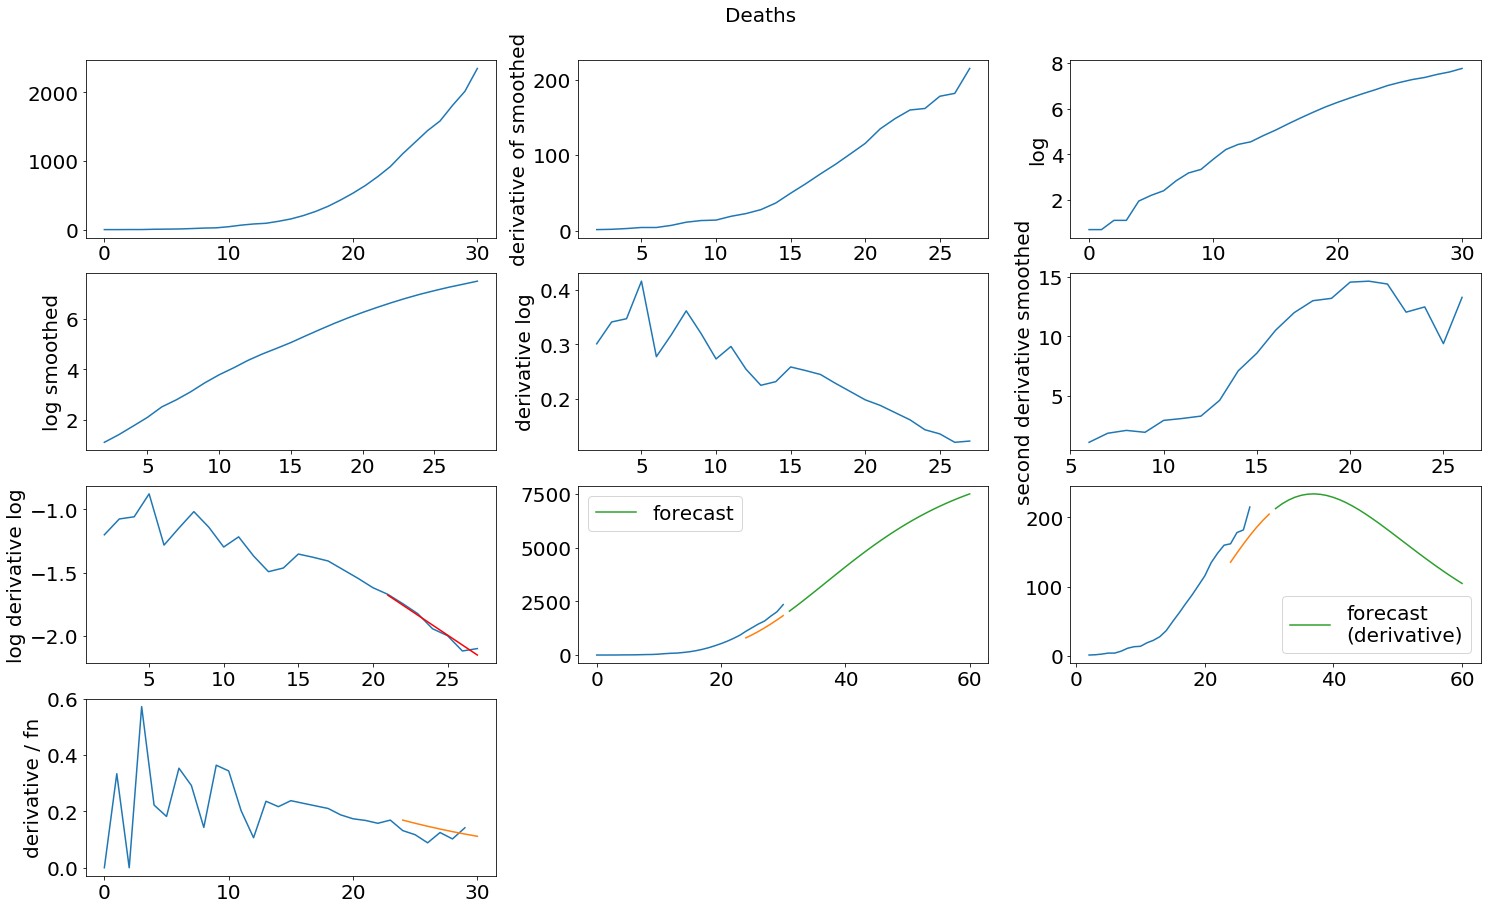

In [42]:
create_plots(ger, text='Deaths', k=7)

Peak in -9 days
< 100 new in 44 days
Total number = 164578


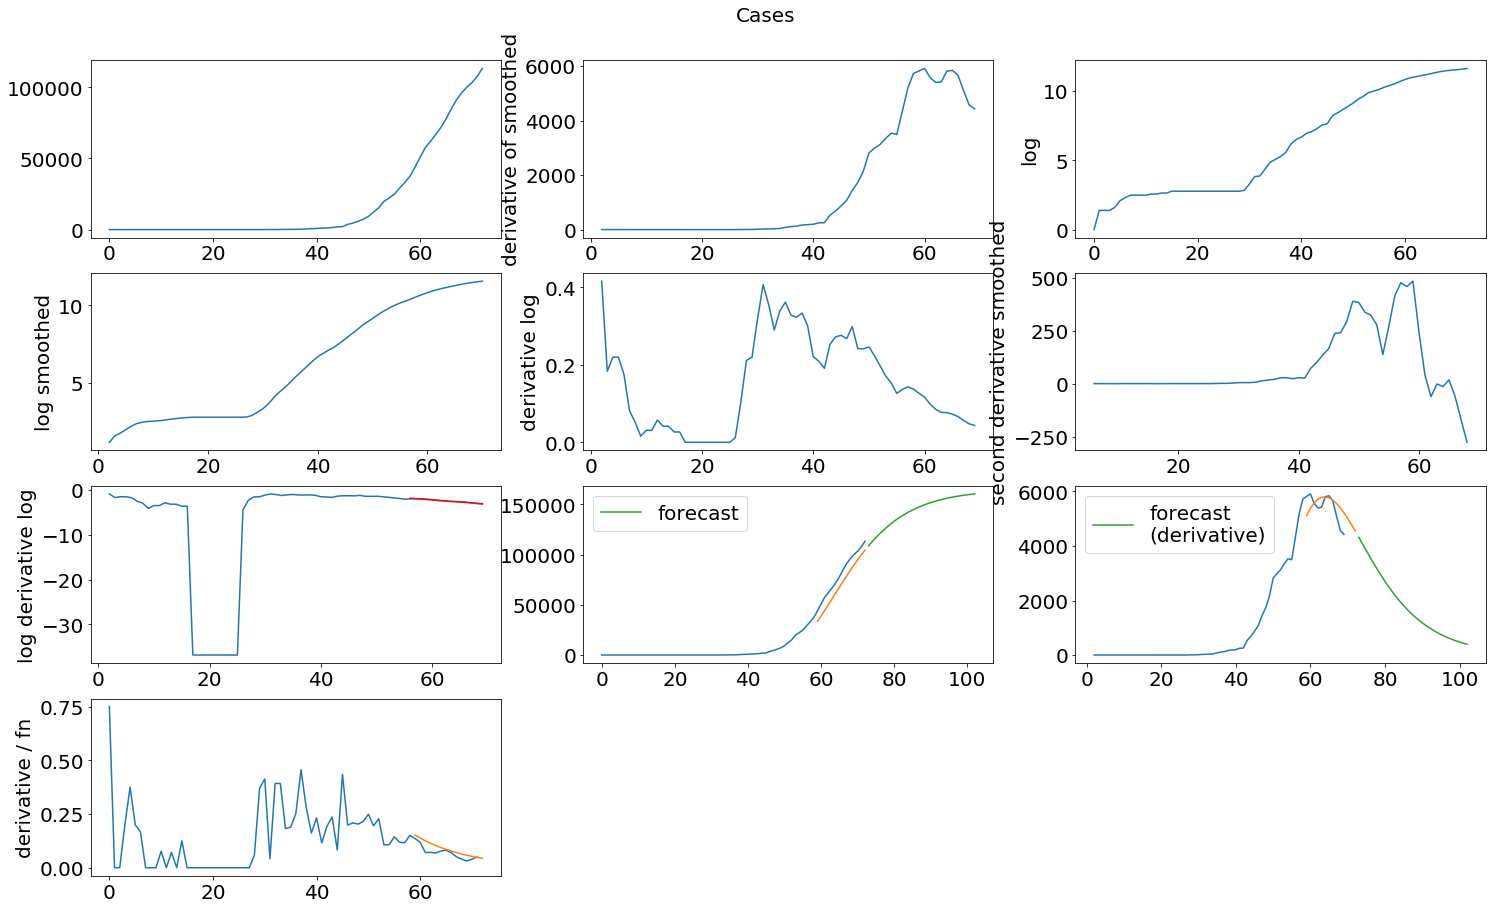

In [43]:
create_plots(gerc, text='Cases', k=14, threshold=100)

In [44]:
gr = df[df['Country/Region'] == 'Greece']
grc = cases_df[cases_df['Country/Region'] == 'Greece']

Peak in -4 days
< 5 new in 0 days
Total number = 166


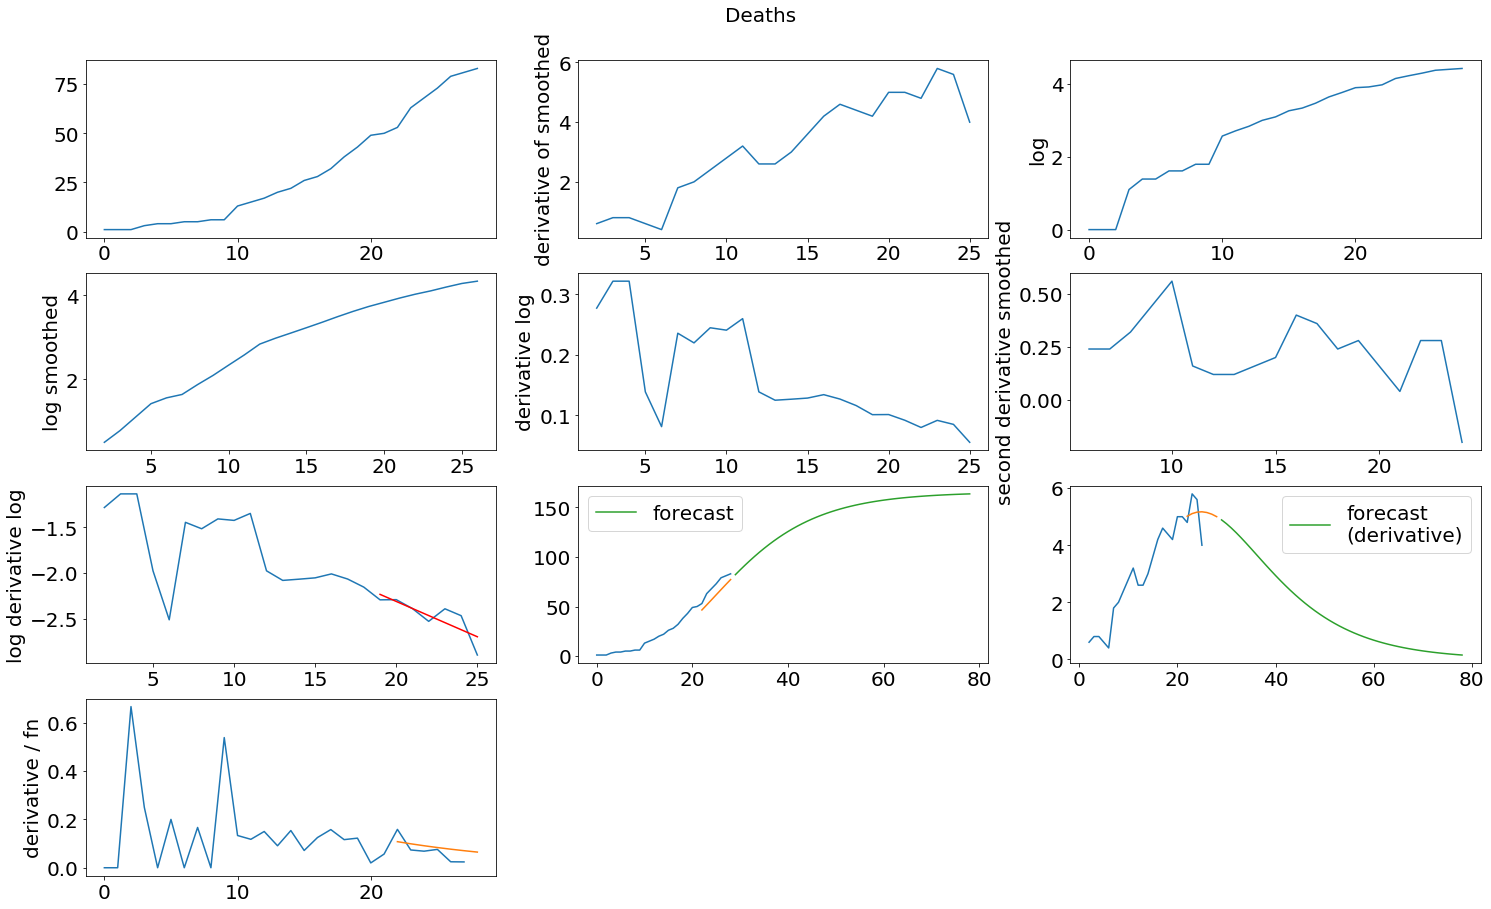

In [72]:
create_plots(gr, text='Deaths', k=7, m=50, threshold=5)

Peak in -12 days
< 100 new in 0 days
Total number = 2086


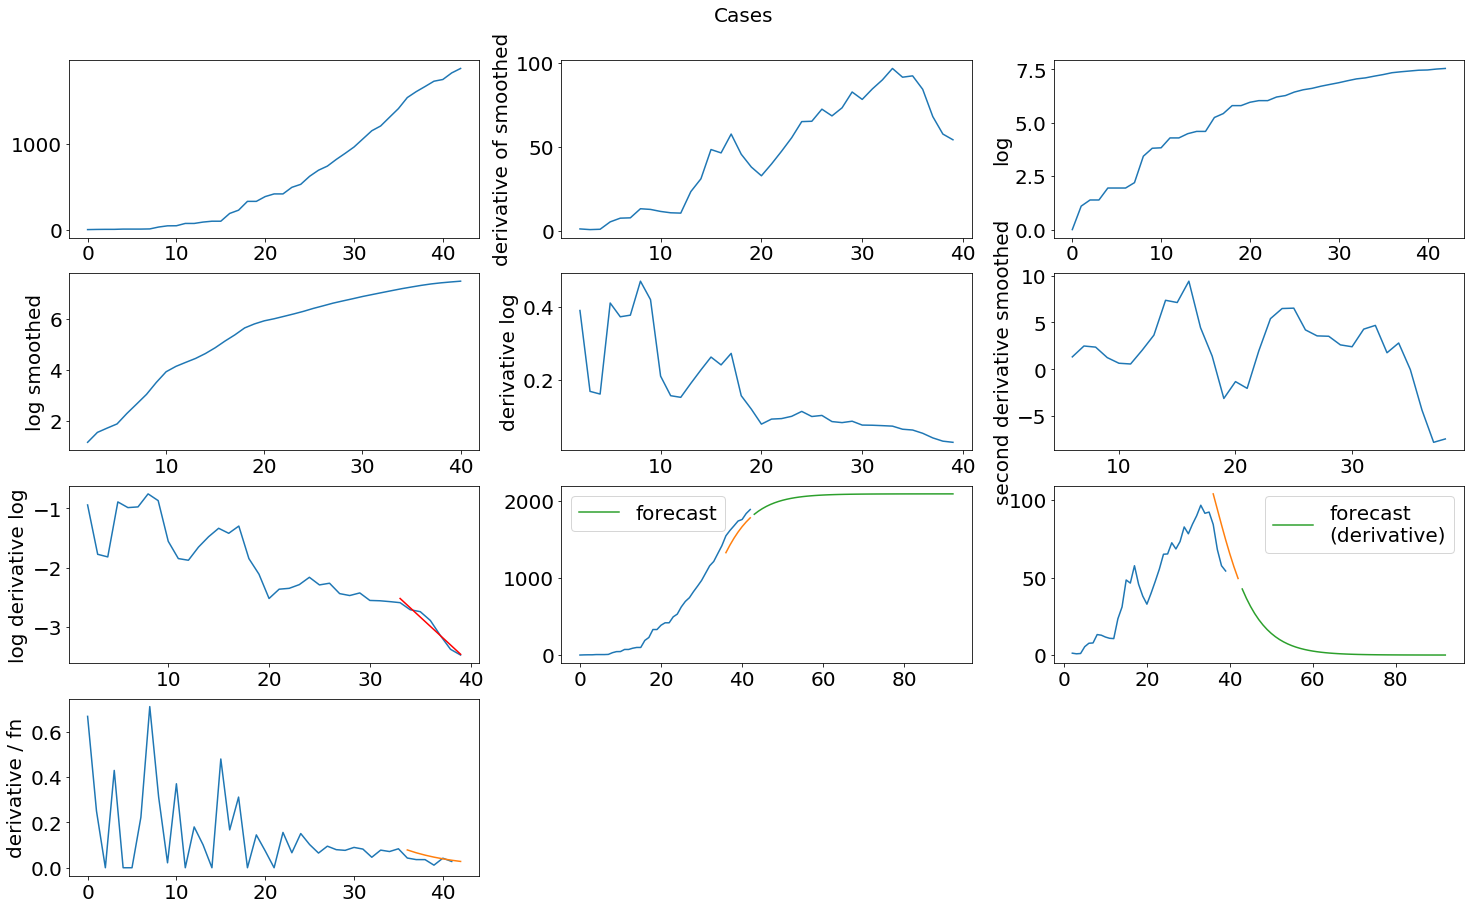

In [71]:
create_plots(grc, text='Cases', k=7, m=50, threshold=100)

In [47]:
sw = df[df['Country/Region'] == 'Sweden']
swc = cases_df[cases_df['Country/Region'] == 'Sweden']

Peak in 5 days
< 5 new in 54 days
Total number = 2529


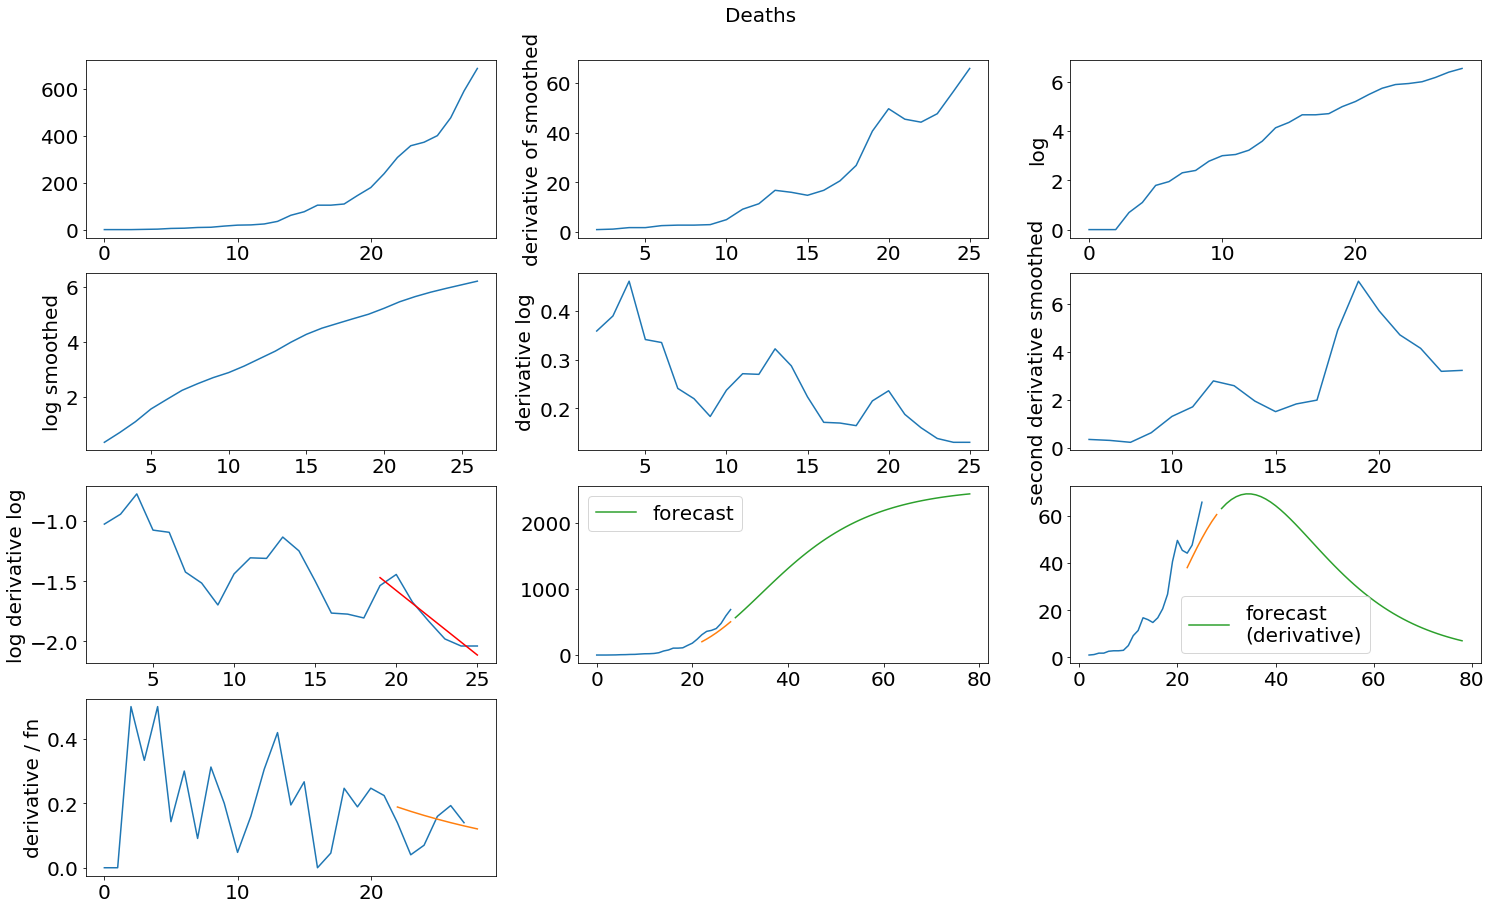

In [70]:
create_plots(sw, text='Deaths', k=7, m=50, threshold=5)

Peak in 18 days
< 100 new in 101 days
Total number = 54892


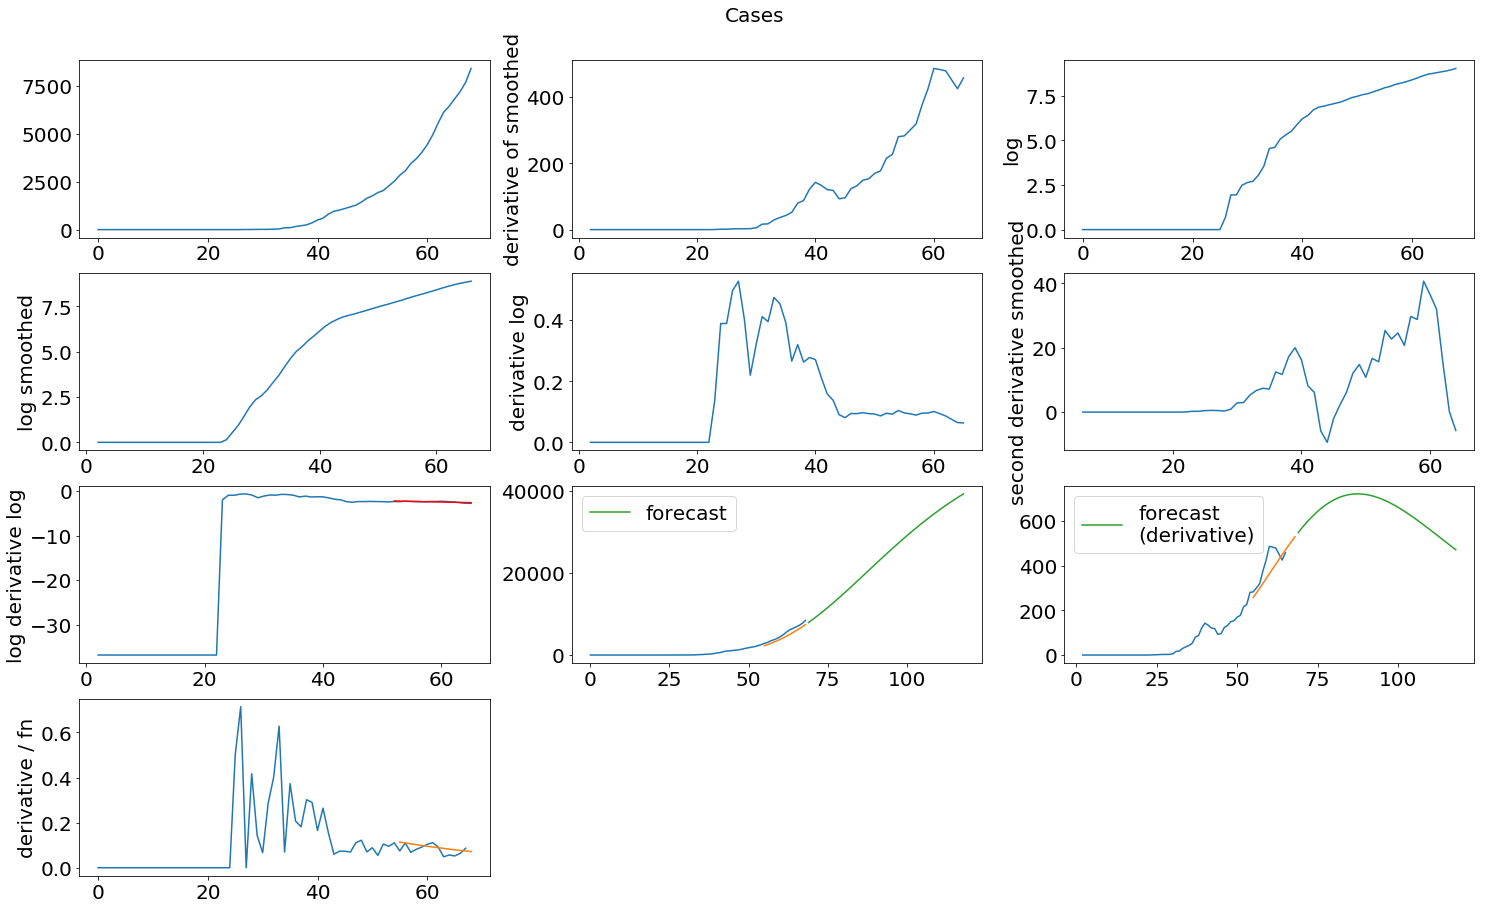

In [49]:
create_plots(swc, text='Cases', k=14, m=50, threshold=100, max_nfev=1000)

In [50]:
de = df[(df['Province/State'] == 'nan') & (df['Country/Region'] == 'Denmark')]
dec = cases_df[(df['Province/State'] == 'nan') & (cases_df['Country/Region'] == 'Denmark')]

Peak in -4 days
< 5 new in 15 days
Total number = 401


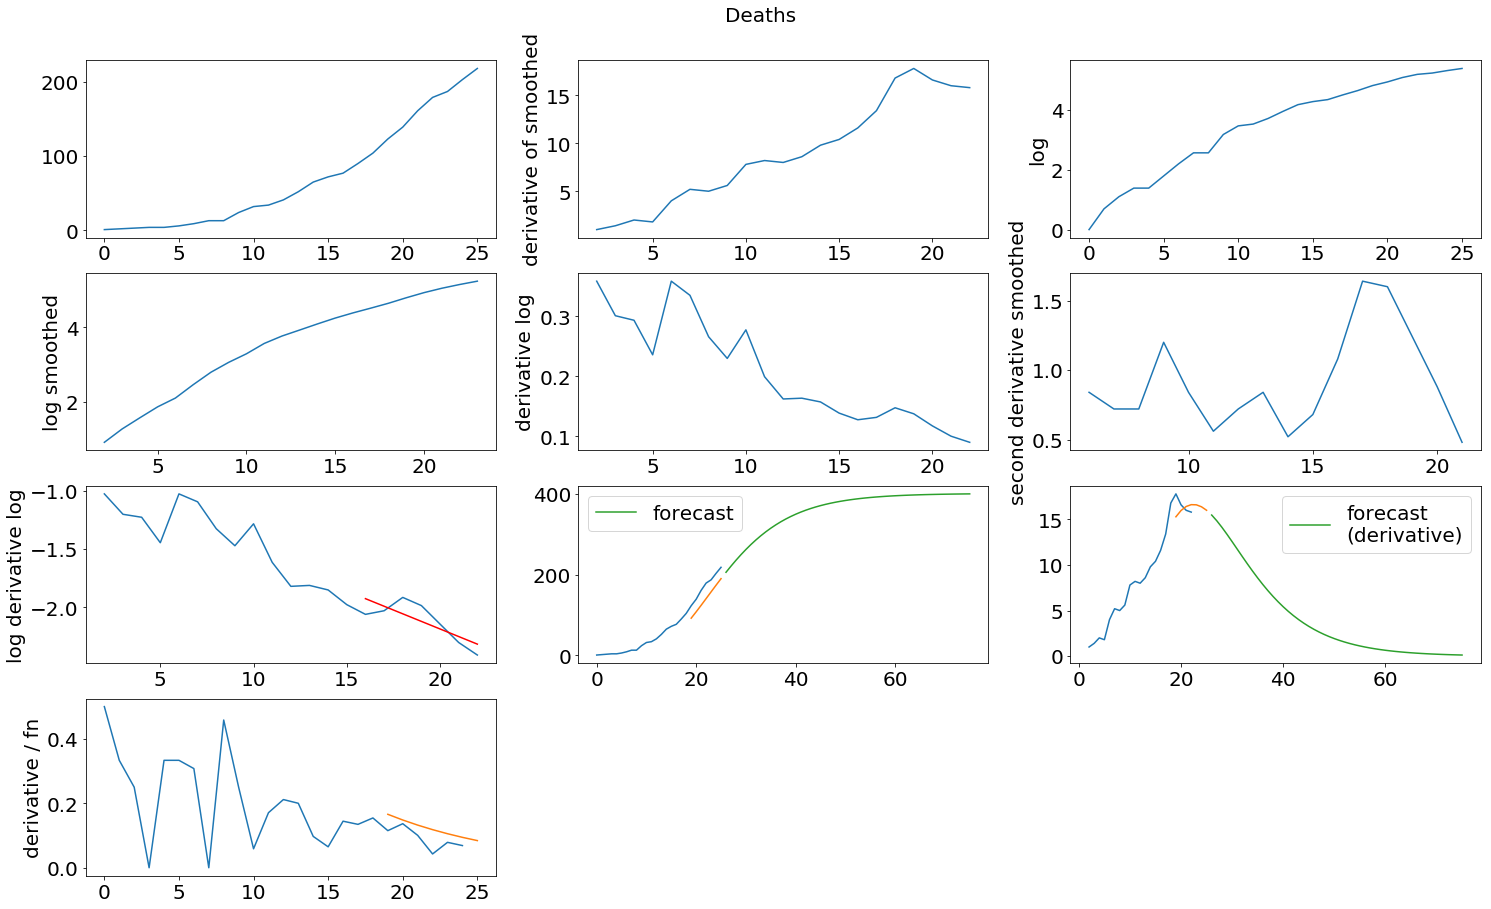

In [69]:
create_plots(de, text='Deaths', k=7, m=50, threshold=5)

Peak in 9 days
< 100 new in 59 days
Total number = 23278


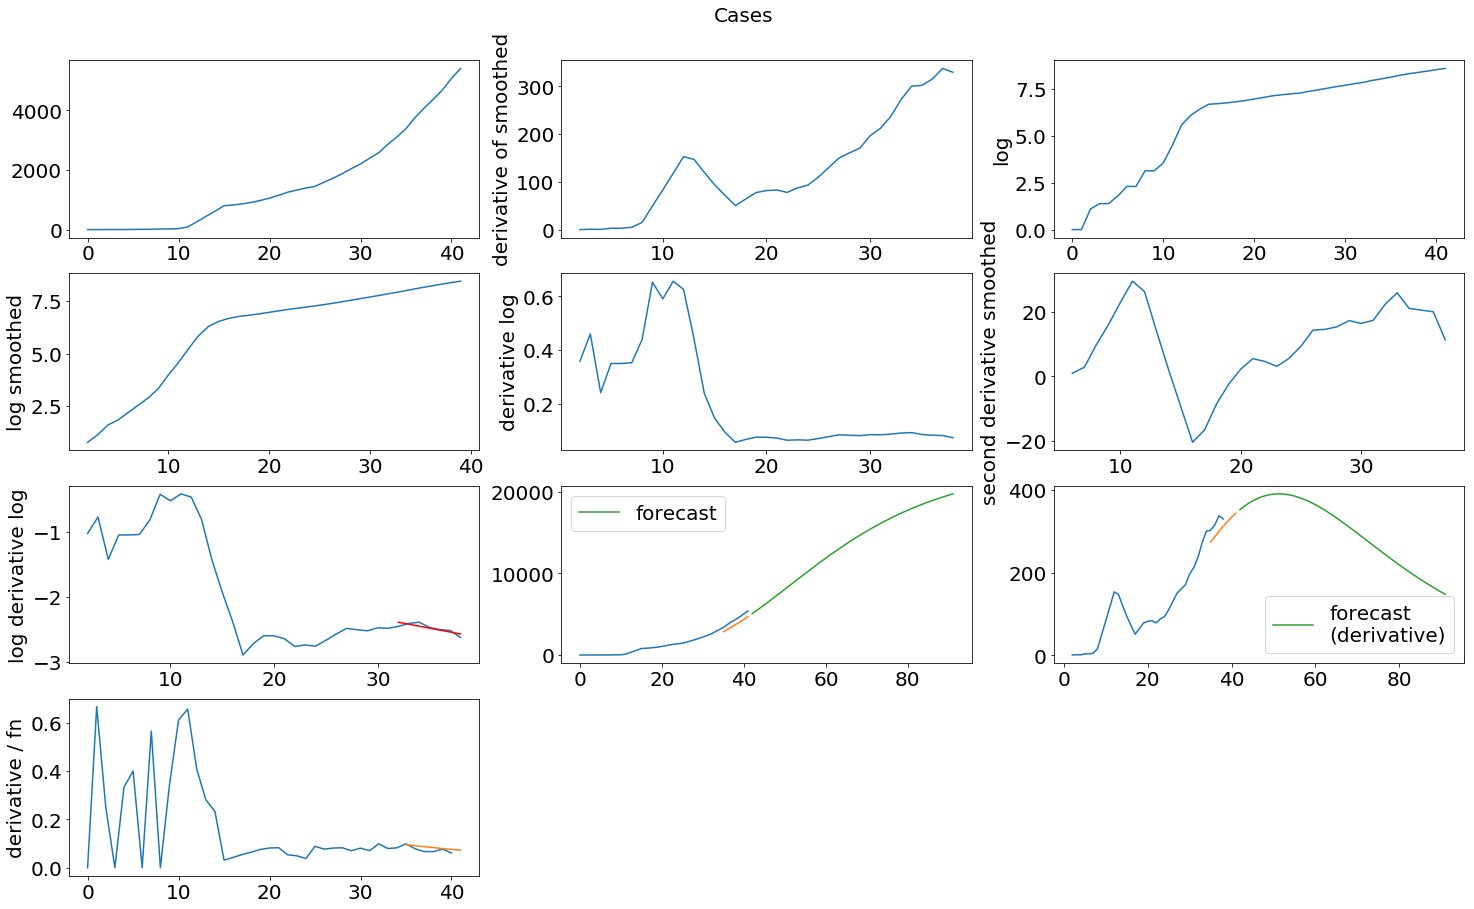

In [68]:
create_plots(dec, text='Cases', k=7, m=50, threshold=100)

In [53]:
ind = df[df['Country/Region'] == 'India']
indc = cases_df[cases_df['Country/Region'] == 'India']

Peak in 98 days
Total number = 369405


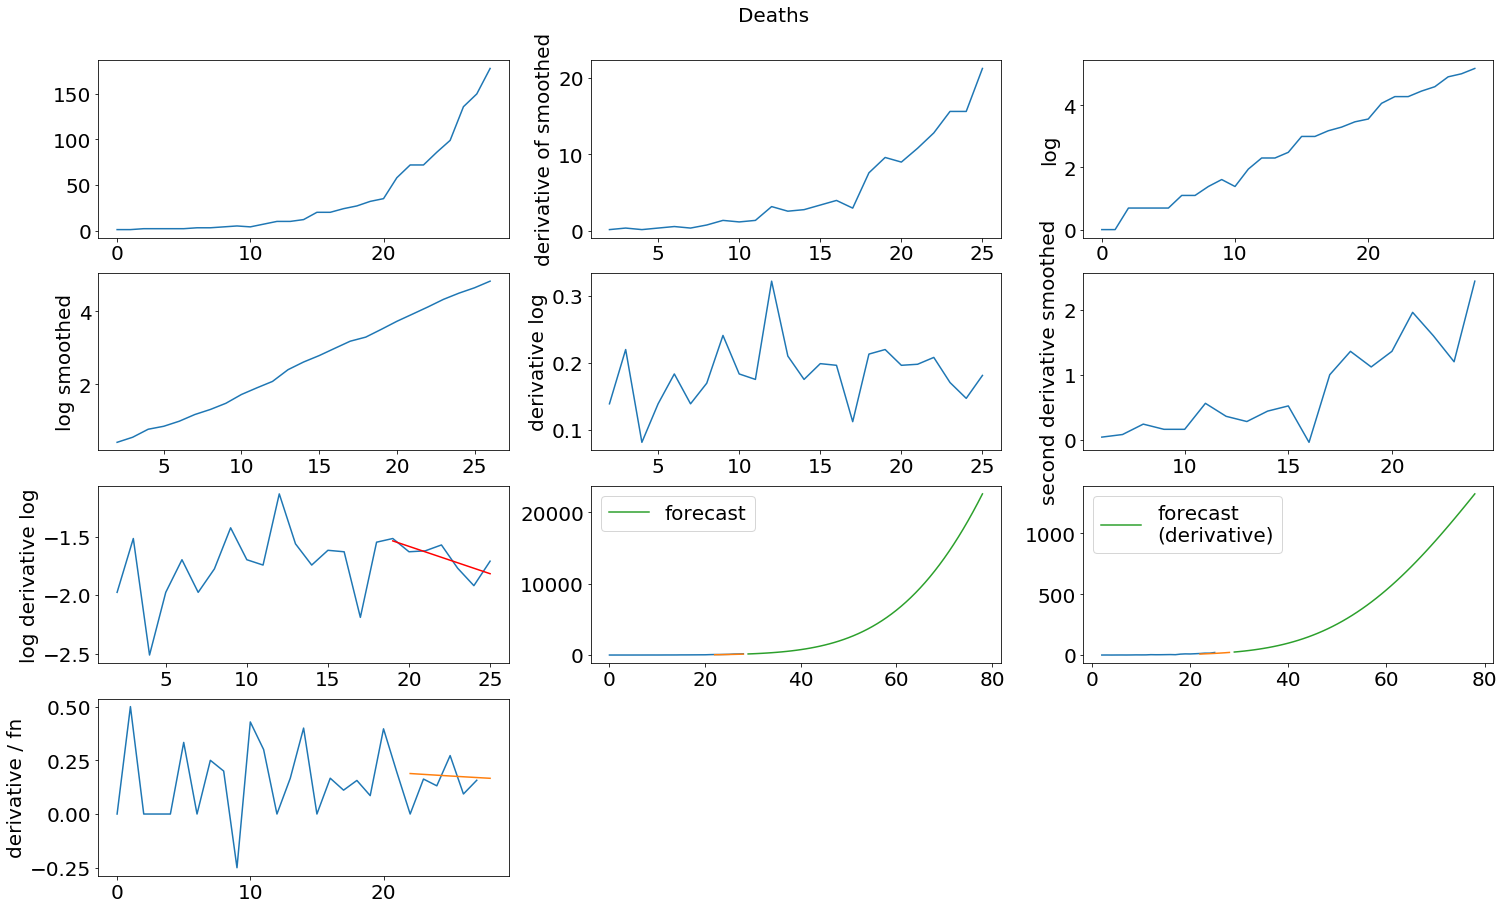

In [54]:
create_plots(ind, text='Deaths', k=7, m=50, threshold=5, max_nfev=1000)

Peak in 74 days
Total number = 2756898


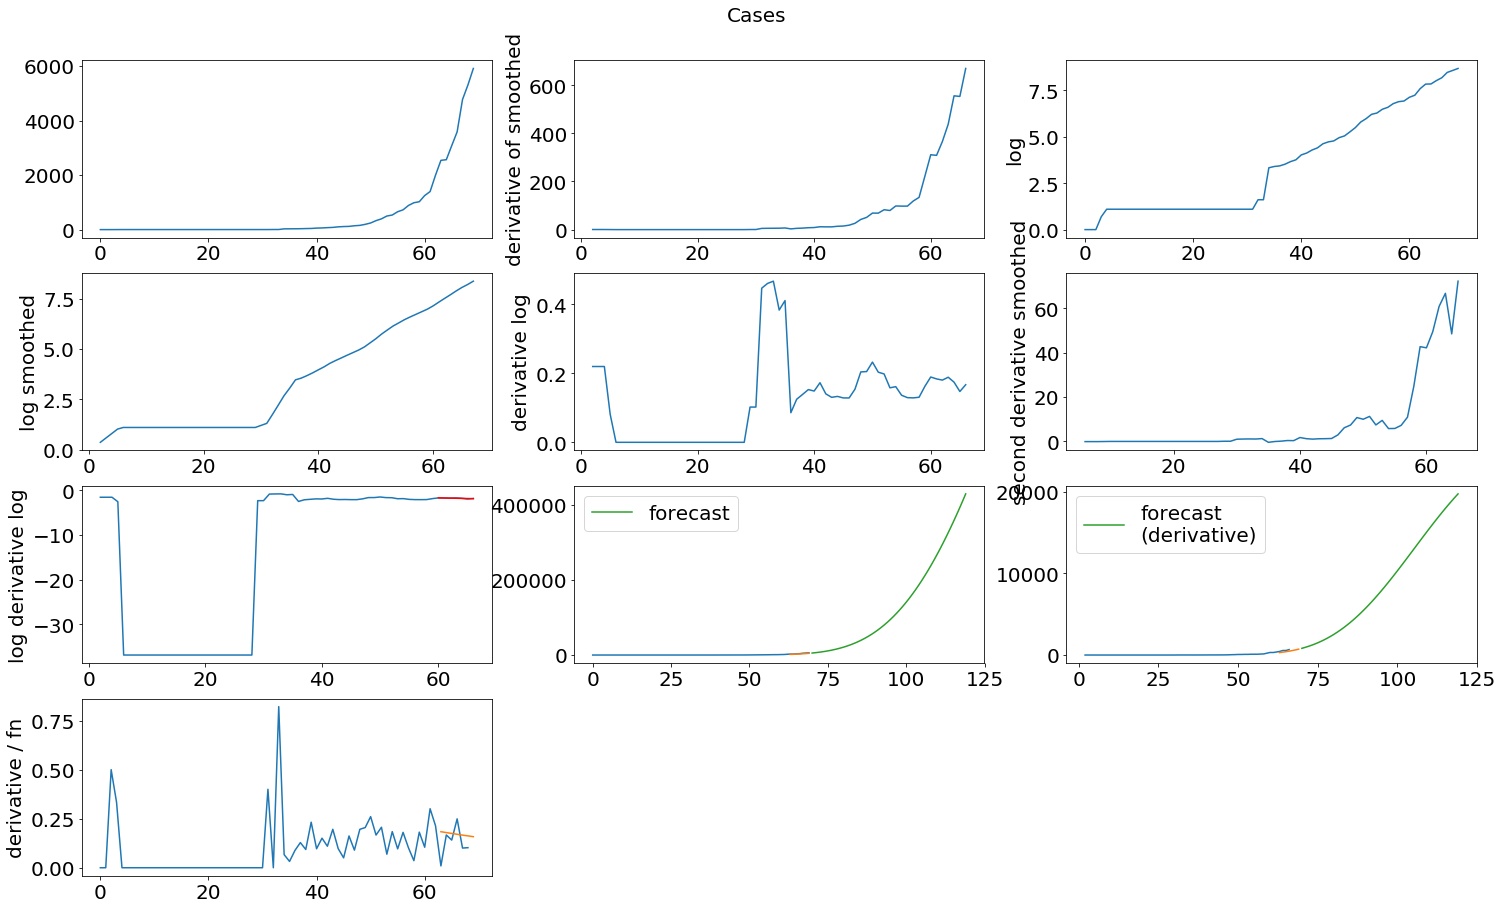

In [55]:
create_plots(indc, text='Cases', k=7, m=50, threshold=100, max_nfev=1000)

In [56]:
au = df[df['Country/Region'] == 'Austria']
auc = cases_df[cases_df['Country/Region'] == 'Austria']

Peak in -6 days
< 5 new in 13 days
Total number = 392


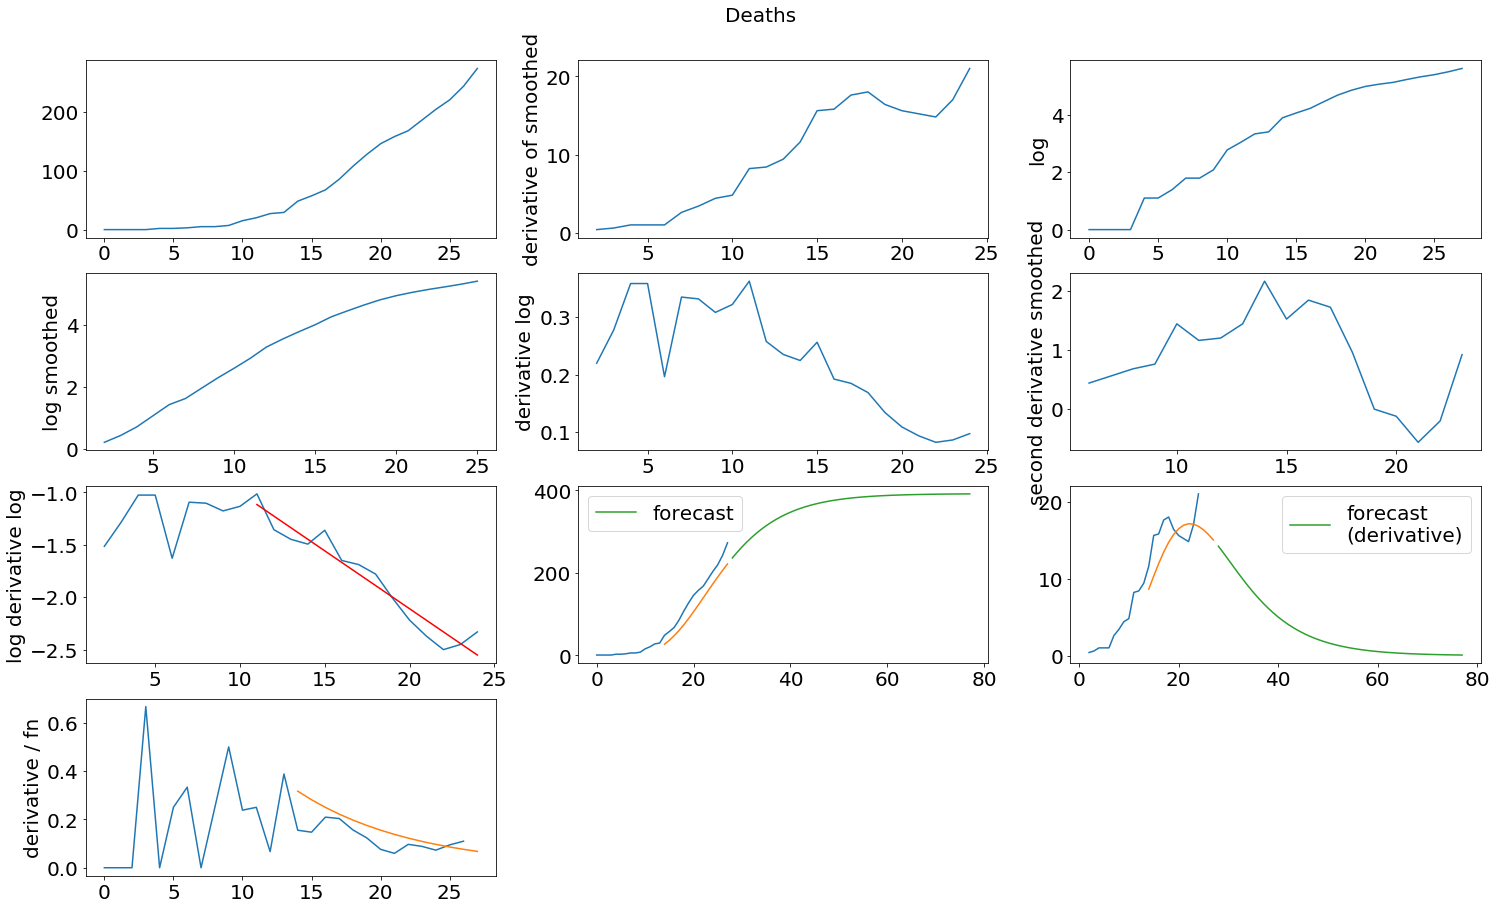

In [67]:
create_plots(au, text='Deaths', k=14, m=50, threshold=5)

Peak in -14 days
< 100 new in 6 days
Total number = 14037


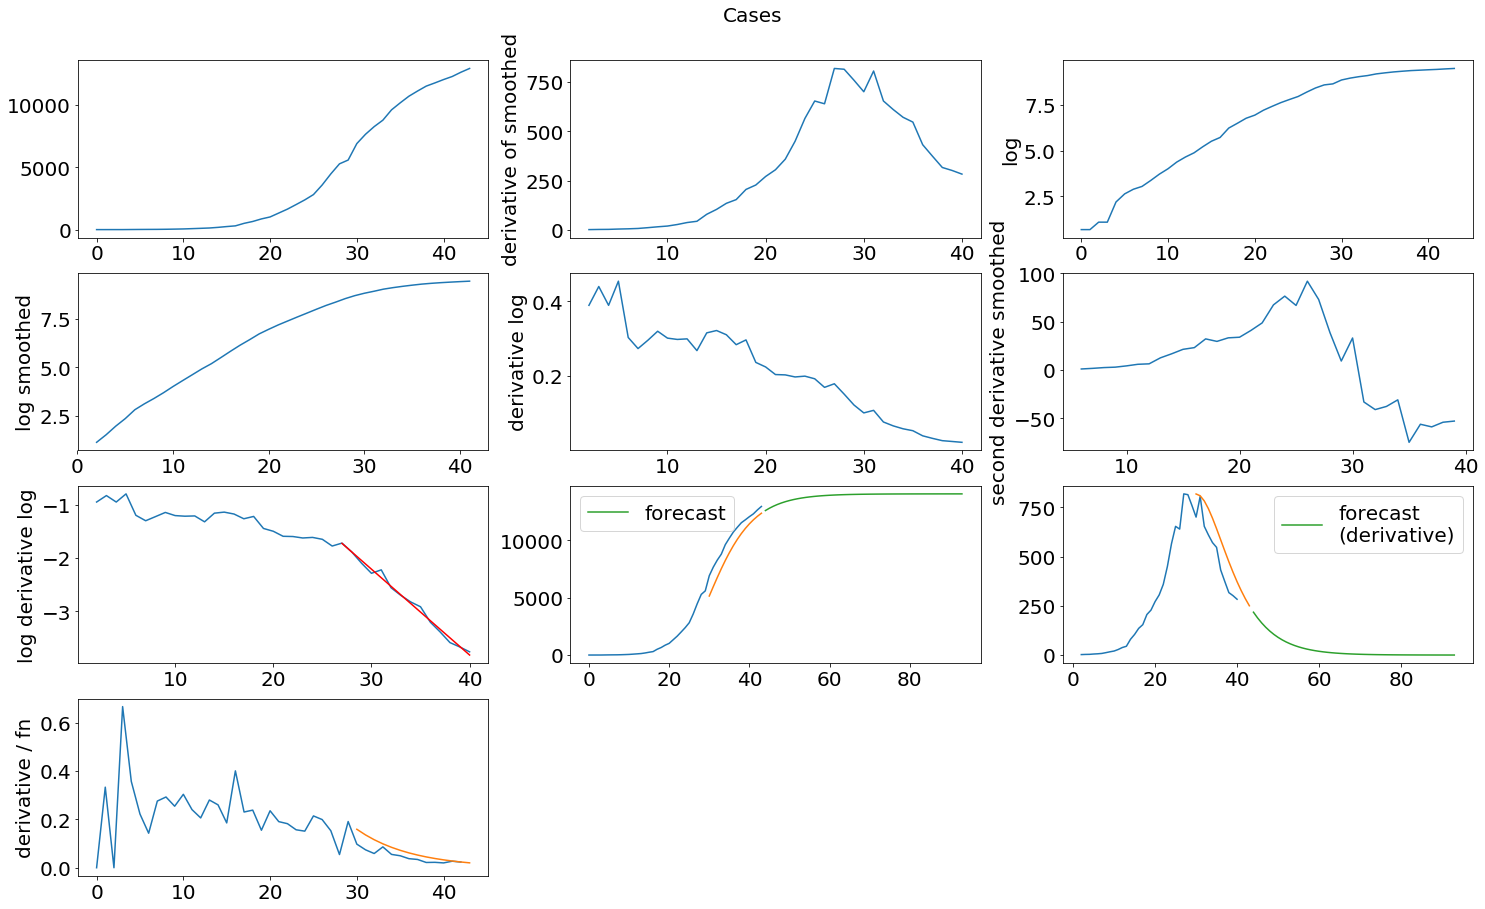

In [58]:
create_plots(auc, text='Cases', k=14, m=50, threshold=100)

In [59]:
tu = df[df['Country/Region'] == 'Turkey']
tuc = cases_df[cases_df['Country/Region'] == 'Turkey']

Peak in -2 days
< 5 new in 28 days
Total number = 1630


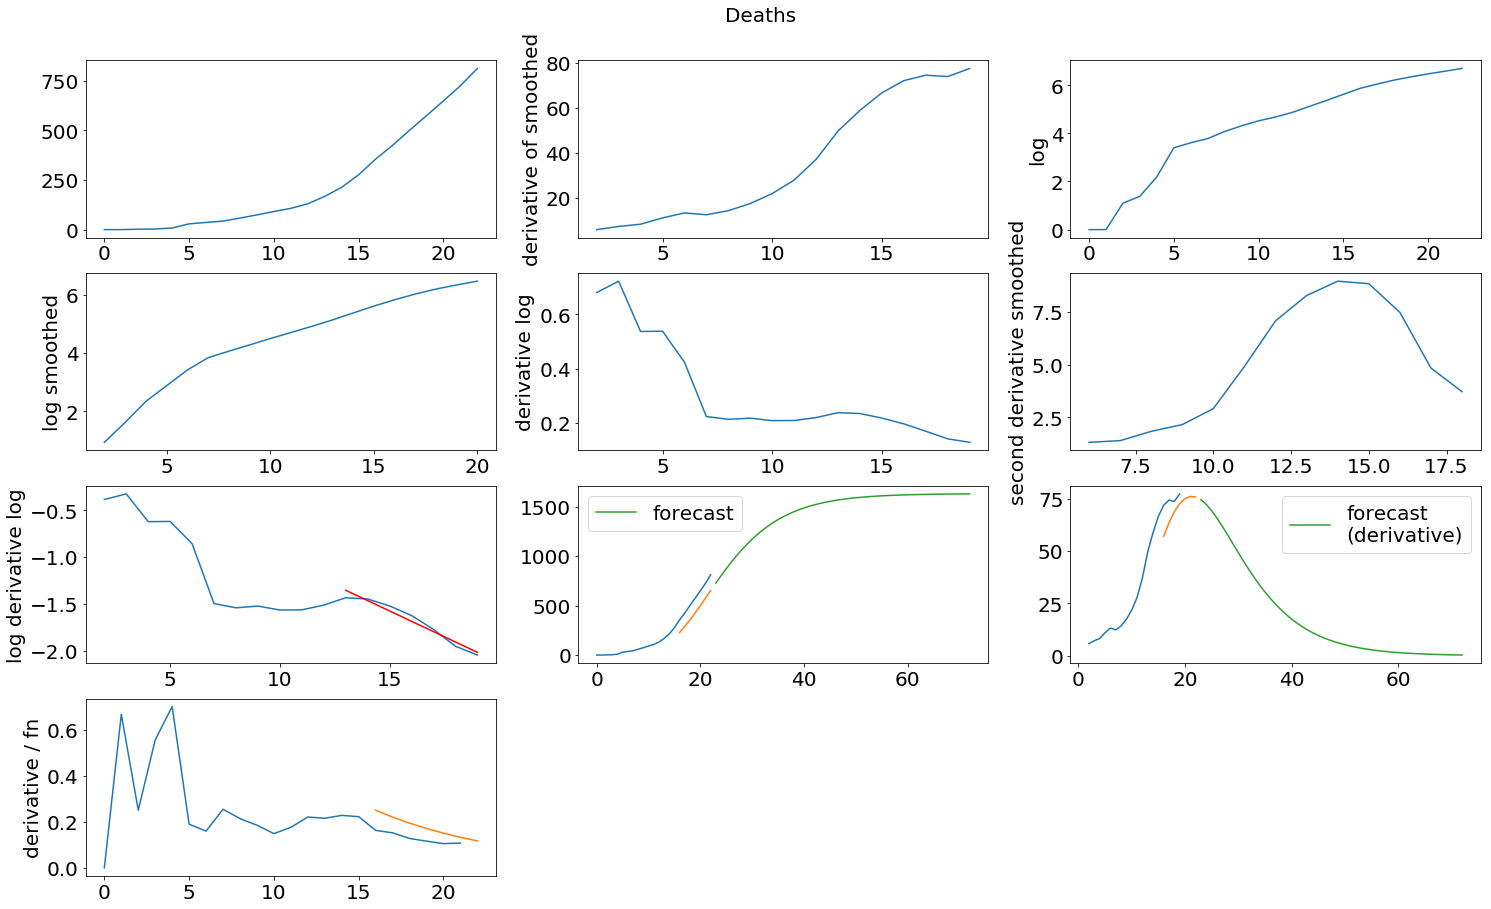

In [62]:
create_plots(tu, text='Deaths', k=7, m=50, threshold=5)

Peak in 9 days
< 100 new in 89 days
Total number = 199508


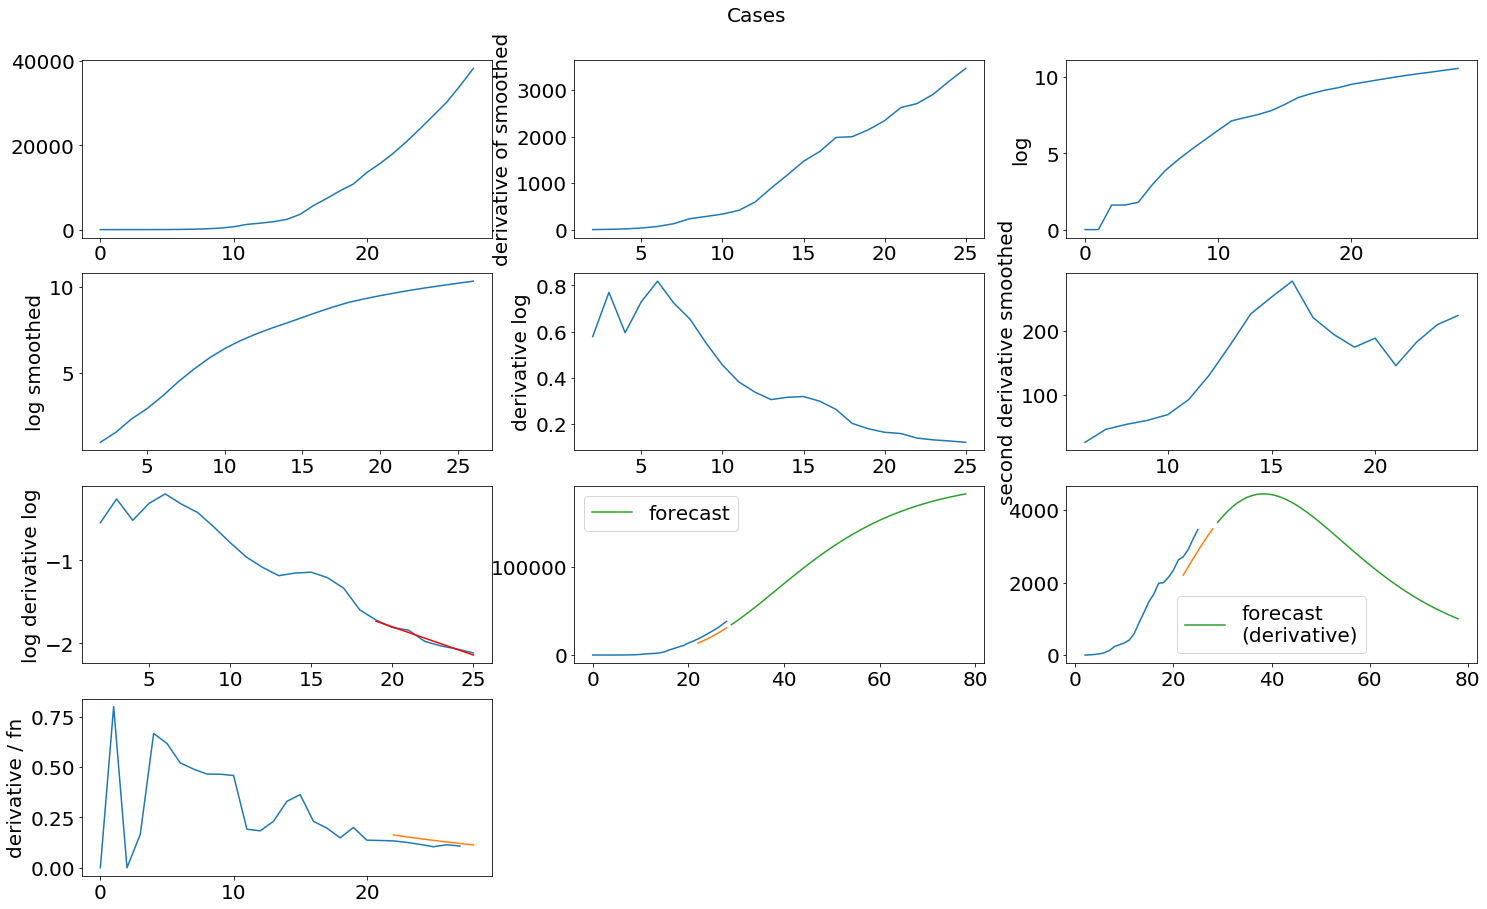

In [63]:
create_plots(tuc, text='Cases', k=7, m=50, threshold=100)